#### Importy

In [22]:
from pandas import read_csv, to_datetime, read_excel, Series, date_range, DataFrame
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, shapiro, t, kstest, normaltest, anderson
from scipy.integrate import quad
from statsmodels.stats.diagnostic import lilliefors

# Importy danych

### Średnia cena ziemniaka (2010-2024)

https://www.dlahandlu.pl/koszyk/towar/ziemniaki-na-wage-1-kg,35.html

In [23]:
dane_ziemniak = [
    1.37,1.50,1.66,1.81,1.95,2.15,1.70,1.44,1.45,1.43,1.52,1.67, #2010
    1.82,2.14,2.27,2.46,2.47,2.07,1.33,0.85,0.83,0.77,0.80,0.78, #2011
    0.78,0.76,0.89,0.83,0.97,1.20,0.89,0.70,0.72,0.70,0.81,0.97, #2012
    1.07,1.21,1.27,1.35,1.83,2.00,1.54,1.33,1.34,1.41,1.39,1.47, #2013
    1.55,1.72,1.71,1.68,1.86,1.74,0.90,0.93,0.76,0.88,0.91,0.75, #2014
    0.87,0.89,0.82,0.89,1.28,1.41,1.05,1.03,1.08,1.16,1.15,1.28, #2015
    1.37,1.47,1.55,1.82,2.24,2.09,1.34,1.17,1.00,1.11,1.39,1.20, #2016
    1.34,1.13,1.28,1.67,2.09,2.21,1.34,1.38,1.32,1.45,1.24,1.36, #2017
    1.54,1.55,1.49,1.61,2.20,1.41,1.69,1.38,1.67,1.53,1.97,1.83, #2018
    2.07,2.15,2.48,2.82,3.82,3.74,3.28,2.76,3.03,2.58,2.90,2.36, #2019
    3.03,3.03,3.23,2.92,2.60,2.27,2.29,1.40,1.43,1.52,1.39,1.41, #2020
    1.56,1.66,1.91,2.41,1.65,3.06,2.12,1.77,2.11,2.15,2.04,2.26, #2021
    2.41,2.19,2.17,2.00,2.32,2.39,2.38,2.21,1.84,2.14,2.72,2.17, #2022
    2.14,2.10,2.31,2.21,2.51,3.36,3.67,2.64,2.91,2.55,2.56,2.48, #2023
    2.78,2.43,3.09,3.46,3.26,3.50,3.29,2.83,2.86,2.45,2.76,2.68 #2024
]
daty_ziemniak = date_range(start="2010-01", end="2024-12", freq="MS")
# ze względu na brak danych w kwietniu 2020 uśredniono dane z marca i maja 2020

### Otyłość WHO (procent w Polsce, lata 1990-2022)

https://data.who.int/indicators/i/C6262EC/BEFA58B

In [24]:
dane_otylosc_global = read_csv('dane\\otylosc_who.csv')
dane_otylosc = dane_otylosc_global[
    (dane_otylosc_global["GEO_NAME_SHORT"] == "Poland") &
    (dane_otylosc_global["DIM_SEX"] == "TOTAL")
]
dane_otylosc = dane_otylosc.sort_values(by="DIM_TIME")
dane_otylosc = dane_otylosc["RATE_PER_100_N"].tolist()
daty_otylosc = list(range(1990, 2023))

### Cena cukru (dziennie, 2010-2024)

https://www.dlahandlu.pl/koszyk/towar/cukier-bialy-krysztal-1-kg,22.html

In [25]:
dane_cukier = [
    2.55,2.52,2.45,2.45,2.41,2.38,2.33,2.69,2.89,2.86,2.77,2.86, # 2010
    3.01,3.43,4.71,4.72,4.33,3.93,3.93,3.61,3.68,3.61,3.72,3.61, # 2011
    3.78,3.79,3.79,3.84,3.80,3.84,3.80,3.77,3.78,3.73,3.78,3.76, # 2012
    3.67,3.53,3.67,3.55,3.55,3.47,3.33,3.22,3.14,3.15,3.01,2.85, # 2013
    2.83,2.73,2.58,2.35,2.18,2.24,2.04,2.16,1.93,1.98,1.89,1.81, # 2014
    1.85,1.85,1.98,2.00,1.98,1.94,2.20,2.21,2.30,2.28,2.33,2.34, # 2015
    2.32,2.55,2.60,2.61,2.67,2.65,2.91,2.82,3.07,2.96,3.11,2.98, # 2016
    3.16,2.95,2.93,3.14,2.97,3.12,2.97,3.06,2.84,2.71,2.87,2.46, # 2017
    2.02,2.48,1.96,2.41,1.96,1.91,2.14,2.00,2.03,2.21,2.06,1.87, # 2018
    2.36,2.36,2.57,2.34,2.65,2.37,2.62,2.47,2.68,2.42,2.73,2.42, # 2019
    2.70,2.50,2.54,2.63,2.72,2.66,2.47,2.65,2.38,2.38,2.59,2.57, # 2020
    2.75,2.42,2.53,2.81,2.61,2.51,3.01,2.44,2.53,3.11,3.03,3.33, # 2021
    3.06,3.06,3.33,3.34,3.93,3.33,4.25,5.49,6.76,5.65,6.64,6.00, # 2022
    6.68,6.02,6.63,6.02,6.59,5.90,6.54,5.81,6.14,5.60,6.03,5.70, # 2023
    6.12,4.76,4.90,5.09,4.55,5.31,4.40,4.86,3.65,4.53,3.51,3.30] # 2024
daty_cukier = date_range(start="2010-01", end="2024-12", freq="MS")
# ze względu na brak danych w kwietniu 2020 uśredniono dane z marca i maja 2020

###  Notowania giełdowe PEPSICO (PEP) - od 13.04.2015 do 31.03.2025, co tydzień

https://www.nasdaq.com/market-activity/stocks/pep/historical?page=1&rows_per_page=10&timeline=y10

In [26]:

dane_notowania = read_csv('dane\\notowania.csv')
dane_notowania['Date'] = to_datetime(dane_notowania['Date'], format='%m/%d/%Y')
dane_notowania = dane_notowania.sort_values('Date')
dane_notowania.set_index('Date', inplace=True)
# Ustalenie startowej daty: 13.04.2015
start_date = to_datetime('2015-04-13')
dane_notowania = dane_notowania[dane_notowania.index >= start_date]
dane_notowania = dane_notowania.resample('7D').first()
daty_notowania = dane_notowania.index.tolist()
dane_notowania = dane_notowania["Close/Last"].tolist()
dane_notowania = [float(x.replace('$', '')) for x in dane_notowania]
# aby uniknąć problemu związanemu z brakiem danych w weekendy i dni niehandlowe, bierzemy notowanie z każdego poniedziałku (jeśli nie ma z danego poniedziałku, to z wtorku etc.)

### Kursy walut (07.2020-04.2025)

1) Bierzemy pod uwagę kurs sprzedaży obcej waluty (np. euro na pln) - zakładamy, że faktura wystawiona jest w obcej walucie
2) Złym scenariuszem dla nas będzie, jeśli wartość portfela spada
4) Bierzemy pod uwagę eksport PepsiCo Polska do Niemiec, Czech, Węgier i Słowacji (50% euro, 25% korona czeska, 25% forint węgierski)
5) Ponownie bierzemy kurs z każdego poniedziałku

https://www.bankier.pl/narzedzia/archiwum-kursow-walutowych

#### Euro

In [27]:
dane = read_csv('dane\\euro.csv', sep=';', encoding='windows-1250', skiprows=1)
# Usuń wiersze, które nie mają poprawnej daty
dane = dane[to_datetime(dane['Data'], errors='coerce').notna()]
dane['Data'] = to_datetime(dane['Data'], format='%Y-%m-%d')
dane = dane.sort_values('Data')
dane.set_index('Data', inplace=True)
start_date = to_datetime('2020-07-13')
dane = dane[dane.index >= start_date]
dane = dane.resample('7D').first()
daty_waluty = dane.index.tolist()
dane_euro = dane["Kurs"].tolist()

#### CZK

In [28]:
dane = read_csv('dane\\czk.csv', sep=';', encoding='windows-1250', skiprows=1)
# Usuń wiersze, które nie mają poprawnej daty
dane = dane[to_datetime(dane['Data'], errors='coerce').notna()]
dane['Data'] = to_datetime(dane['Data'], format='%Y-%m-%d')
dane = dane.sort_values('Data')
dane.set_index('Data', inplace=True)
start_date = to_datetime('2020-07-13')
dane = dane[dane.index >= start_date]
dane = dane.resample('7D').first()
dane_czk = dane["Kurs"].tolist()


#### HUF

In [29]:
dane = read_csv('dane\\huf.csv', sep=';', encoding='windows-1250', skiprows=1)
# Usuń wiersze, które nie mają poprawnej daty
dane = dane[to_datetime(dane['Data'], errors='coerce').notna()]
dane['Data'] = to_datetime(dane['Data'], format='%Y-%m-%d')
dane = dane.sort_values('Data')
dane.set_index('Data', inplace=True)
start_date = to_datetime('2020-07-13')
dane = dane[dane.index >= start_date]
dane = dane.resample('7D').first()
dane_huf = dane["Kurs"].tolist()


#### Portfel

In [30]:
wagi = np.array([0.5, 0.25, 0.25])
dane = np.array([dane_euro, dane_czk, dane_huf])
n = len(dane)
dane_waluty = sum([wagi[i]*dane[i] for i in range(n)])
dane_waluty = dane_waluty.tolist()

### Zysk netto Pepsico Inc. (12.2009-12.2024)

https://www.macrotrends.net/stocks/charts/PEP/pepsico/gross-profit

Dane w milionach dolarów

In [31]:
dane = read_excel("dane/zysk_netto.xlsx", header=None, names=["Data", "Cena"])
dane["Data"] = to_datetime(dane["Data"], format="%d.%m.%Y")
# Usuń symbol dolara i przecinki, zamień na float
dane["Cena"] = dane["Cena"].replace(r'[\$,]', '', regex=True).astype(float)
df_sorted = dane.sort_values("Data")
daty_zysk = df_sorted["Data"].tolist()
dane_zysk = df_sorted["Cena"].tolist()

### Print wszystkich danych przed transformacją

In [11]:
print("1) Dane firmy matki:")
print("1.1) Notowania giełdowe: ")
print(dane_notowania)
print("1.2) Zysk brutto: ")
print(dane_zysk)
print("2) Dane walutowe: ")
print(dane_waluty)
print("3) Dane produktów: ")
print("3.1) Ceny ziemniaka: ")
print(dane_ziemniak)
print("3.2) Cena cukru: ")
print(dane_cukier)
print("4) Dane otyłość: ")
print(dane_otylosc)

1) Dane firmy matki:
1.1) Notowania giełdowe: 
[95.53, 96.5, 94.49, 95.95, 96.35, 98.05, 95.79, 95.97, 92.84, 92.64, 95.6, 93.69, 94.4, 97.22, 97.31, 95.66, 97.45, 99.09, 99.86, 91.83, 92.93, 92.37, 91.2, 93.71, 92.47, 95.81, 99.14, 100.18, 102.54, 101.4, 98.88, 99.56, 100.85, 100.16, 100.67, 97.95, 98.62, 100.68, 98.77, 97.44, 95.77, 95.94, 99.03, 97.52, 98.6, 99.87, 97.82, 99.25, 100.65, 101.54, 100.98, 103.82, 104.3, 103.72, 102.8, 103.43, 105.28, 104.13, 100.42, 101.17, 102.7, 103.06, 103.37, 102.13, 106.42, 108.91, 109.21, 109.02, 108.93, 108.14, 108.72, 107.96, 107.99, 107.92, 106.02, 105.67, 107.03, 108.25, 106.22, 106.85, 107.31, 107.2, 106.96, 101.39, 102.26, 102.79, 100.71, 104.72, 105.41, 105.13, 104.65, 103.46, 102.19, 104.01, 103.69, 104.57, 106.52, 109.36, 109.27, 109.63, 109.41, 111.15, 111.83, 111.86, 112.02, 113.32, 114.32, 112.28, 113.22, 113.94, 114.7, 118.01, 117.88, 116.23, 117.29, 117.12, 115.44, 114.27, 114.93, 116.13, 116.61, 116.96, 117.84, 118.26, 115.54, 115.

# Miary ryzyka dla przypadku jednowymiarowego

## Dla notowań giełdowych:

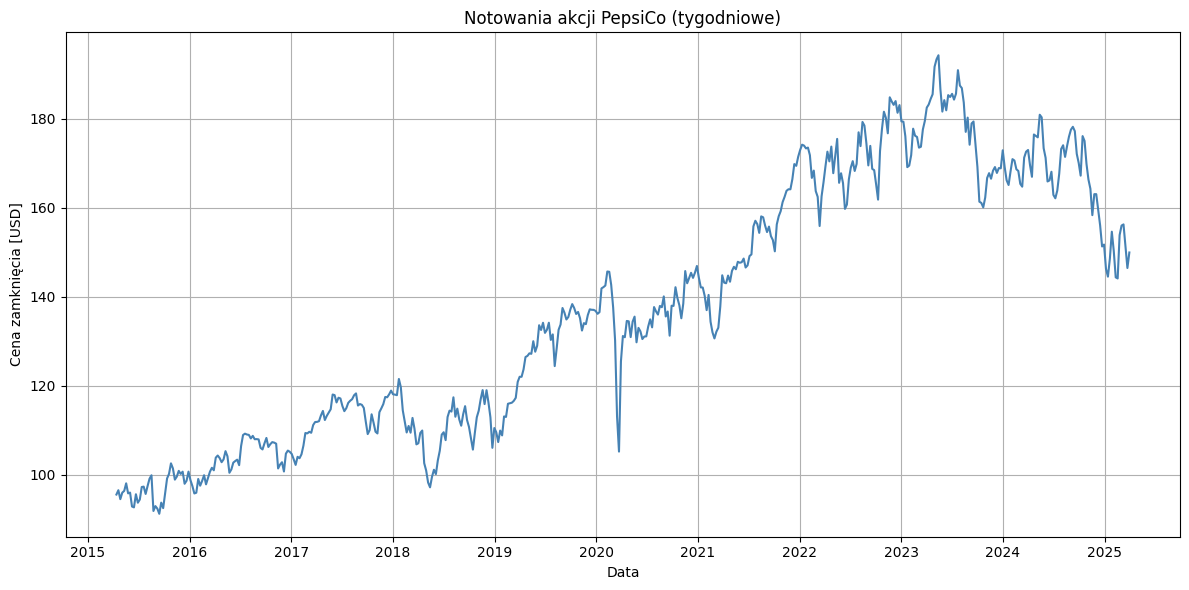

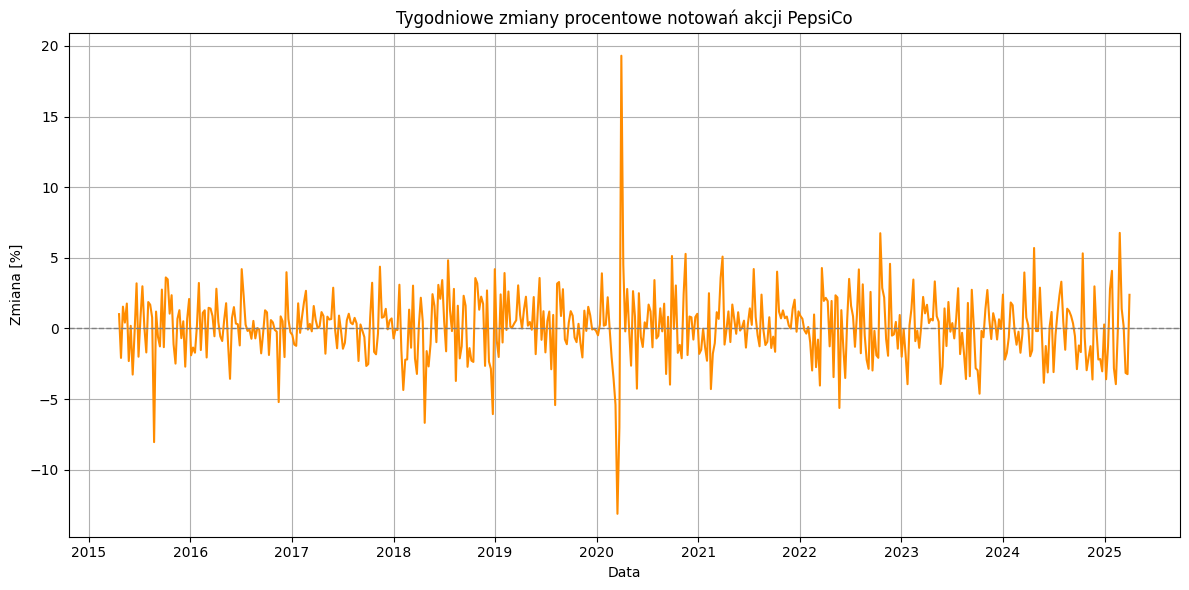

In [12]:
# Rysowanie wykresu notowań
plt.figure(figsize=(12, 6))
plt.plot(daty_notowania, dane_notowania, linestyle='-', color='steelblue')
plt.title('Notowania akcji PepsiCo (tygodniowe)')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia [USD]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_notowania).pct_change().dropna() * 100
daty_zmian = daty_notowania[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.plot(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Tygodniowe zmiany procentowe notowań akcji PepsiCo')
plt.xlabel('Data')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Podejście parametryczne

#### Testy normalności

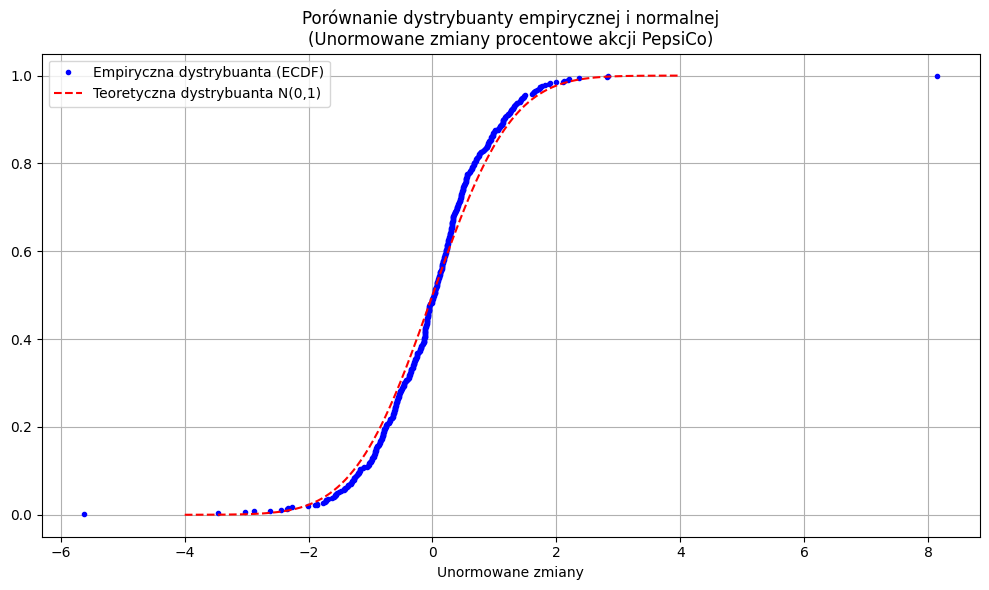

In [13]:
# Unormowanie danych
zmiany_array = np.array(zmiany_procentowe)
zmiany_z = (zmiany_array - np.mean(zmiany_array)) / np.std(zmiany_array)

# Obliczenie ECDF unormowanych danych
sorted_z = np.sort(zmiany_z)
ecdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Teoretyczna dystrybuanta normalna
z_vals = np.linspace(-4, 4, 500)
normal_cdf = norm.cdf(z_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_z, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta (ECDF)', color='blue')
plt.plot(z_vals, normal_cdf, linestyle='--', label='Teoretyczna dystrybuanta N(0,1)', color='red')
plt.title('Porównanie dystrybuanty empirycznej i normalnej\n(Unormowane zmiany procentowe akcji PepsiCo)')
plt.xlabel('Unormowane zmiany')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
print("=== Test Shapiro-Wilka ===")
stat, p = shapiro(zmiany_procentowe)
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

print("=== Test Kołmogorowa-Lillieforsa ===")
stat, p = lilliefors(zmiany_procentowe, dist='norm')
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

=== Test Shapiro-Wilka ===
Statystyka: 0.9295, p-value: 0.0000
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.

=== Test Kołmogorowa-Lillieforsa ===
Statystyka: 0.0637, p-value: 0.0010
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.



#### Testowanie na t-studenta

Dopasowane parametry rozkładu t:
 - df: 5.24
 - loc: 0.1240
 - scale: 1.7901

Test KS dla rozkładu t:
 - Statystyka: 0.0385, p-value: 0.4123
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.


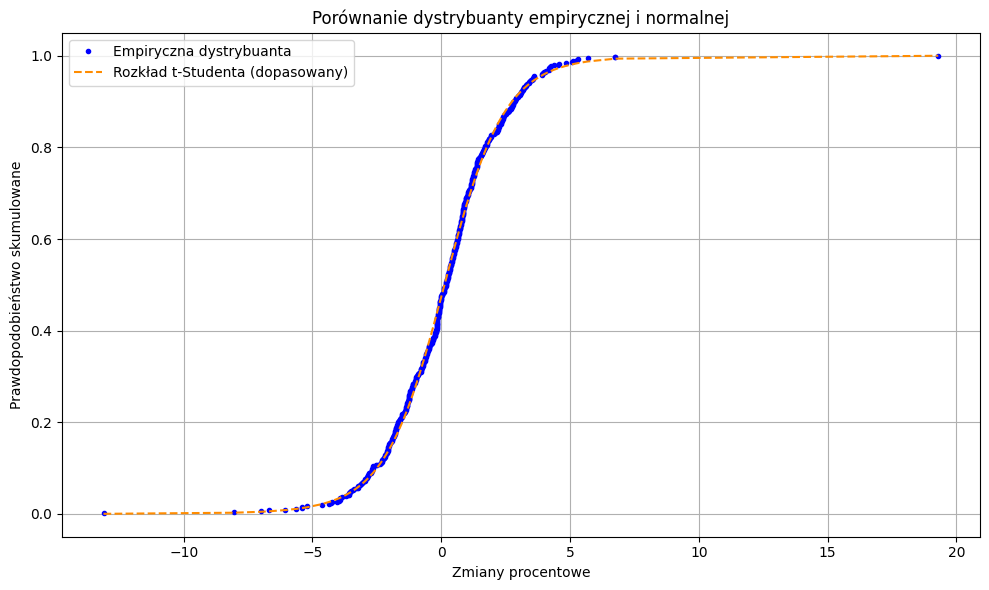

In [15]:
# Unormowane dane lub oryginalne zmiany procentowe:
data = np.array(zmiany_procentowe)

# Dopasuj rozkład t: zwraca df, loc, scale
df_fit, loc_fit, scale_fit = t.fit(data)
print(f"Dopasowane parametry rozkładu t:\n - df: {df_fit:.2f}\n - loc: {loc_fit:.4f}\n - scale: {scale_fit:.4f}")

# Test Kolmogorova-Smirnova
ks_stat, ks_p = kstest(data, 't', args=(df_fit, loc_fit, scale_fit))
print(f"\nTest KS dla rozkładu t:\n - Statystyka: {ks_stat:.4f}, p-value: {ks_p:.4f}")
if ks_p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.")
else:
    print("Odrzucamy hipotezę – dane raczej nie pochodzą z rozkładu t-Studenta.")

# Opcjonalnie: ECDF vs dystrybuanta t-Studenta
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
cdf_t = t.cdf(sorted_data, df_fit, loc=loc_fit, scale=scale_fit)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta', color='blue')
plt.plot(sorted_data, cdf_t, linestyle='--', label='Rozkład t-Studenta (dopasowany)', color='darkorange')
plt.title('Porównanie dystrybuanty empirycznej i normalnej')
plt.xlabel('Zmiany procentowe')
plt.ylabel('Prawdopodobieństwo skumulowane')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Miary ryzyka

In [16]:
# Dla podejścia parametrycznego (rozkład t-studenta v=5.24, loc=0.1240, scale=1.7901)

# Parametry dopasowanego rozkładu t
df = 5.24
loc = 0.1240
scale = 1.7901

mean = t.mean(df, loc=loc, scale=scale)
print(f"Średnia: {mean:.4f}\n")

# 1. Miary zmienności:
std_dev = t.std(df, loc=loc, scale=scale)
var = t.var(df, loc=loc, scale=scale)
print(f"Odchylenie standardowe: {std_dev:.4f}")

# Funkcja do całkowania (|x - mu| * gęstość)
mad_integrand = lambda x: abs(x - loc) * t.pdf(x, df, loc=loc, scale=scale)
# Oblicz MAD przez całkowanie
mad, _ = quad(mad_integrand, -np.inf, np.inf)
print(f"Odchylenie przeciętne (MAD): {mad:.4f}\n")

# 2. Kwantyle
quantiles = t.ppf([0.05, 0.25, 0.5, 0.75, 0.95], df, loc=loc, scale=scale)
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles):
    print(f"Kwantyl {l}: {q:.4f}")

# 3. Rozstęp międzykwartylowy (IQR)
iqr = quantiles[4] - quantiles[2]
print(f"\nRozstęp międzykwartylowy (IQR): {iqr:.4f}")

# 4. Prawdopodobieństwo przekroczenia progu
prog = 0  # wartość referencyjna - 0%
p_above = t.cdf(prog, df, loc=loc, scale=scale)
print(f"\nWartość dystrybuanty w 0: {p_above:.4%}")


Średnia: 0.1240

Odchylenie standardowe: 2.2765
Odchylenie przeciętne (MAD): 1.6834

Kwantyl 5%: -3.4470
Kwantyl 25%: -1.1723
Kwantyl 50% (mediana): 0.1240
Kwantyl 75%: 1.4203
Kwantyl 95%: 3.6950

Rozstęp międzykwartylowy (IQR): 3.5710

Wartość dystrybuanty w 0: 47.3671%


(jednostka: %)

### Podejście nieparametryczne

In [17]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}")

Średnia (z próbki): 0.1142
Odchylenie standardowe (z próbki): 2.3559
Odchylenie przeciętne (z próbki): 1.6864

Kwantyl (z próbki) 5%: -3.4450
Kwantyl (z próbki) 25%: -1.2609
Kwantyl (z próbki) 50% (mediana): 0.1827
Kwantyl (z próbki) 75%: 1.3059
Kwantyl (z próbki) 95%: 3.5693

Rozstęp międzykwartylowy (IQR, z próbki): 3.5710

Wartość dystrybuanty empirycznej w 0 (z próbki): 52.5000%


## Dla zysku brutto:

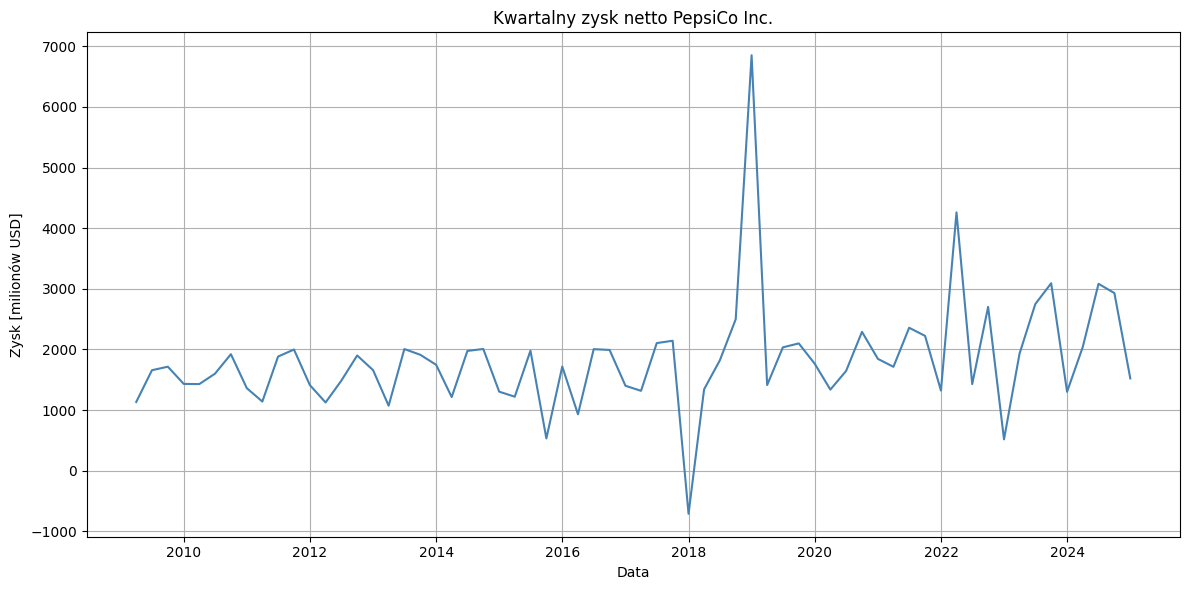

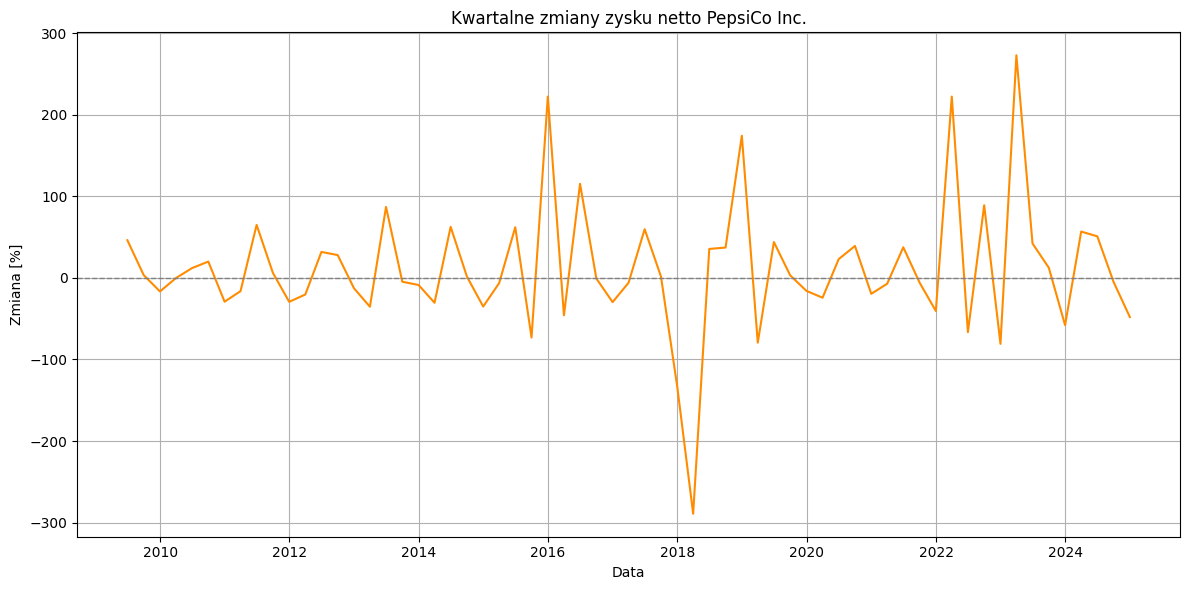

In [18]:
# Rysowanie wykresu notowań
plt.figure(figsize=(12, 6))
plt.plot(daty_zysk, dane_zysk, linestyle='-', color='steelblue')
plt.title('Kwartalny zysk netto PepsiCo Inc.')
plt.xlabel('Data')
plt.ylabel('Zysk [milionów USD]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_zysk).pct_change().dropna() * 100
daty_zmian = daty_zysk[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.plot(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Kwartalne zmiany zysku netto PepsiCo Inc.')
plt.xlabel('Data')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Podejście parametryczne

#### Testy normalności

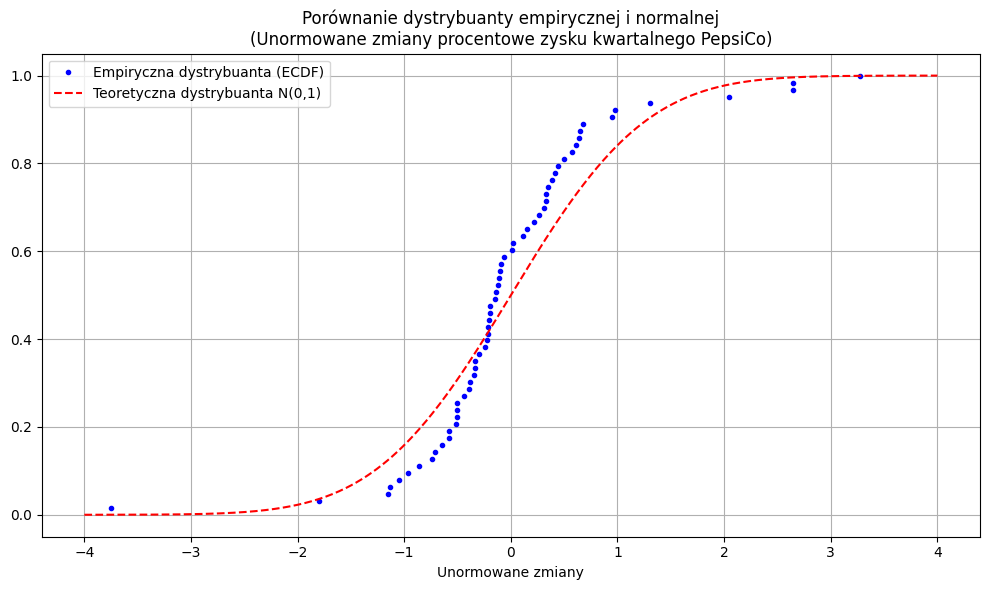

In [19]:
# Unormowanie danych
zmiany_array = np.array(zmiany_procentowe)
zmiany_z = (zmiany_array - np.mean(zmiany_array)) / np.std(zmiany_array)

# Obliczenie ECDF unormowanych danych
sorted_z = np.sort(zmiany_z)
ecdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Teoretyczna dystrybuanta normalna
z_vals = np.linspace(-4, 4, 500)
normal_cdf = norm.cdf(z_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_z, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta (ECDF)', color='blue')
plt.plot(z_vals, normal_cdf, linestyle='--', label='Teoretyczna dystrybuanta N(0,1)', color='red')
plt.title('Porównanie dystrybuanty empirycznej i normalnej\n(Unormowane zmiany procentowe zysku kwartalnego PepsiCo)')
plt.xlabel('Unormowane zmiany')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [20]:
print("=== Test Shapiro-Wilka ===")
stat, p = shapiro(zmiany_procentowe)
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

print("=== Test Kołmogorowa-Lillieforsa ===")
stat, p = lilliefors(zmiany_procentowe, dist='norm')
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

=== Test Shapiro-Wilka ===
Statystyka: 0.8772, p-value: 0.0000
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.

=== Test Kołmogorowa-Lillieforsa ===
Statystyka: 0.1403, p-value: 0.0059
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.



#### Testowanie na t-studenta

Dopasowane parametry rozkładu t:
 - df: 2.04
 - loc: 2.1433
 - scale: 39.0455

Test KS dla rozkładu t:
 - Statystyka: 0.0768, p-value: 0.8238
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.


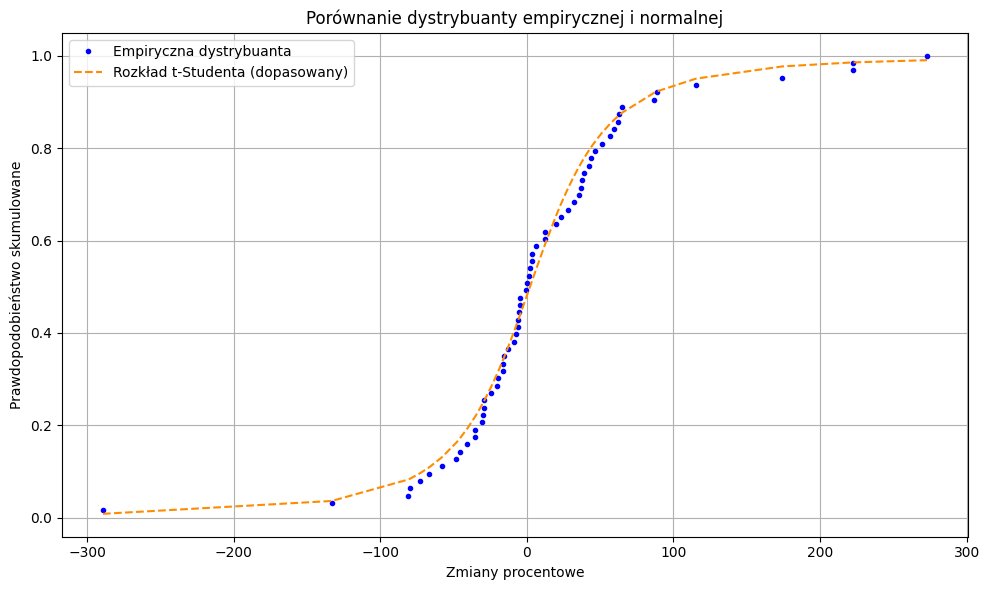

In [21]:
# Unormowane dane lub oryginalne zmiany procentowe:
data = np.array(zmiany_procentowe)

# Dopasuj rozkład t: zwraca df, loc, scale
df_fit, loc_fit, scale_fit = t.fit(data)
print(f"Dopasowane parametry rozkładu t:\n - df: {df_fit:.2f}\n - loc: {loc_fit:.4f}\n - scale: {scale_fit:.4f}")

# Test Kolmogorova-Smirnova
ks_stat, ks_p = kstest(data, 't', args=(df_fit, loc_fit, scale_fit))
print(f"\nTest KS dla rozkładu t:\n - Statystyka: {ks_stat:.4f}, p-value: {ks_p:.4f}")
if ks_p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.")
else:
    print("Odrzucamy hipotezę – dane raczej nie pochodzą z rozkładu t-Studenta.")

# Opcjonalnie: ECDF vs dystrybuanta t-Studenta
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
cdf_t = t.cdf(sorted_data, df_fit, loc=loc_fit, scale=scale_fit)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta', color='blue')
plt.plot(sorted_data, cdf_t, linestyle='--', label='Rozkład t-Studenta (dopasowany)', color='darkorange')
plt.title('Porównanie dystrybuanty empirycznej i normalnej')
plt.xlabel('Zmiany procentowe')
plt.ylabel('Prawdopodobieństwo skumulowane')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Miary ryzyka


In [22]:
# Dla podejścia parametrycznego (rozkład t-studenta v=2.04, loc=2.1433, scale=39.0455)

# Parametry dopasowanego rozkładu t
df = 2.04
loc = 2.1433
scale = 39.0455

mean = t.mean(df, loc=loc, scale=scale)
print(f"Średnia: {mean:.4f}\n")

# 1. Miary zmienności:
std_dev = t.std(df, loc=loc, scale=scale)
var = t.var(df, loc=loc, scale=scale)
print(f"Odchylenie standardowe: {std_dev:.4f}")

# Funkcja do całkowania (|x - mu| * gęstość)
mad_integrand = lambda x: abs(x - loc) * t.pdf(x, df, loc=loc, scale=scale)
# Oblicz MAD przez całkowanie
mad, _ = quad(mad_integrand, -np.inf, np.inf)
print(f"Odchylenie przeciętne (MAD): {mad:.4f}\n")

# 2. Kwantyle
quantiles = t.ppf([0.05, 0.25, 0.5, 0.75, 0.95], df, loc=loc, scale=scale)
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles):
    print(f"Kwantyl {l}: {q:.4f}")

# 3. Rozstęp międzykwartylowy (IQR)
iqr = quantiles[4] - quantiles[2]
print(f"\nRozstęp międzykwartylowy (IQR): {iqr:.4f}")

# 4. Prawdopodobieństwo przekroczenia progu
prog = 0  # wartość referencyjna - 0%
p_above = t.cdf(prog, df, loc=loc, scale=scale)
print(f"\nWartość dystrybuanty w 0: {p_above:.4%}")


Średnia: 2.1433

Odchylenie standardowe: 278.8406
Odchylenie przeciętne (MAD): 54.2778

Kwantyl 5%: -110.3590
Kwantyl 25%: -29.6140
Kwantyl 50% (mediana): 2.1433
Kwantyl 75%: 33.9006
Kwantyl 95%: 114.6456

Rozstęp międzykwartylowy (IQR): 112.5023

Wartość dystrybuanty w 0: 48.0564%


### Podejście nieparametryczne

In [23]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}")

Średnia (z próbki): 11.0105
Odchylenie standardowe (z próbki): 80.6050
Odchylenie przeciętne (z próbki): 52.8253

Kwantyl (z próbki) 5%: -78.7485
Kwantyl (z próbki) 25%: -26.6859
Kwantyl (z próbki) 50% (mediana): -0.2095
Kwantyl (z próbki) 75%: 40.7110
Kwantyl (z próbki) 95%: 168.4055

Rozstęp międzykwartylowy (IQR, z próbki): 112.5023

Wartość dystrybuanty empirycznej w 0 (z próbki): 49.2063%


## Dla cen cukru:

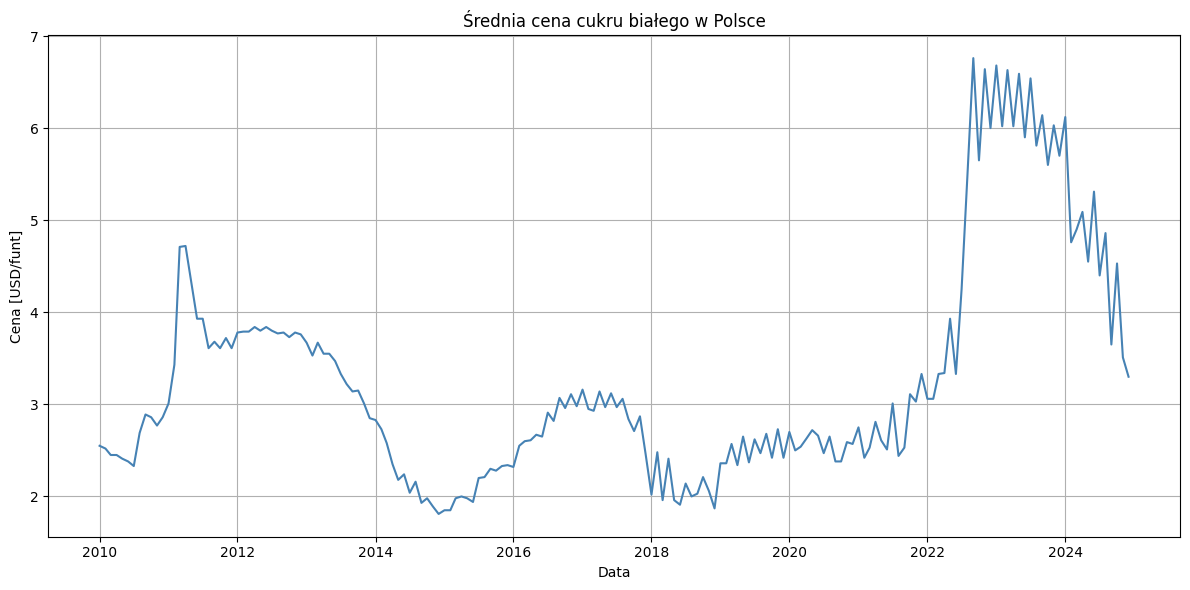

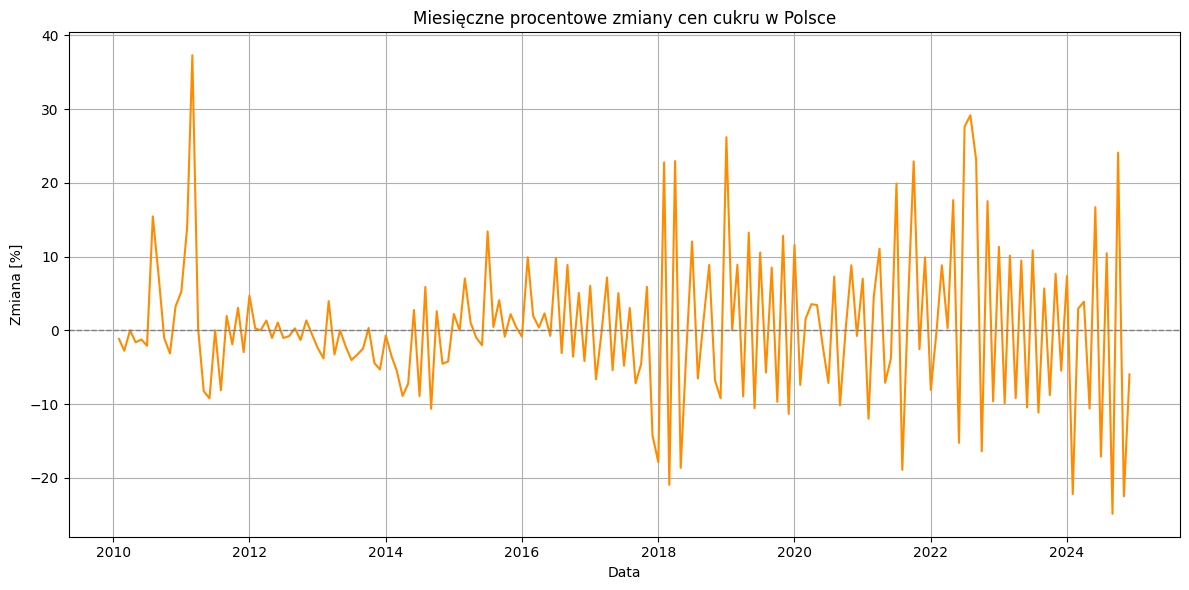

In [38]:
# Rysowanie wykresu notowań
plt.figure(figsize=(12, 6))
plt.plot(daty_cukier, dane_cukier, linestyle='-', color='steelblue')
plt.title('Średnia cena cukru białego w Polsce')
plt.xlabel('Data')
plt.ylabel('Cena [USD/funt]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_cukier).pct_change().dropna() * 100
daty_zmian = daty_cukier[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.plot(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Miesięczne procentowe zmiany cen cukru w Polsce')
plt.xlabel('Data')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Podejście parametryczne

#### Testy normalności

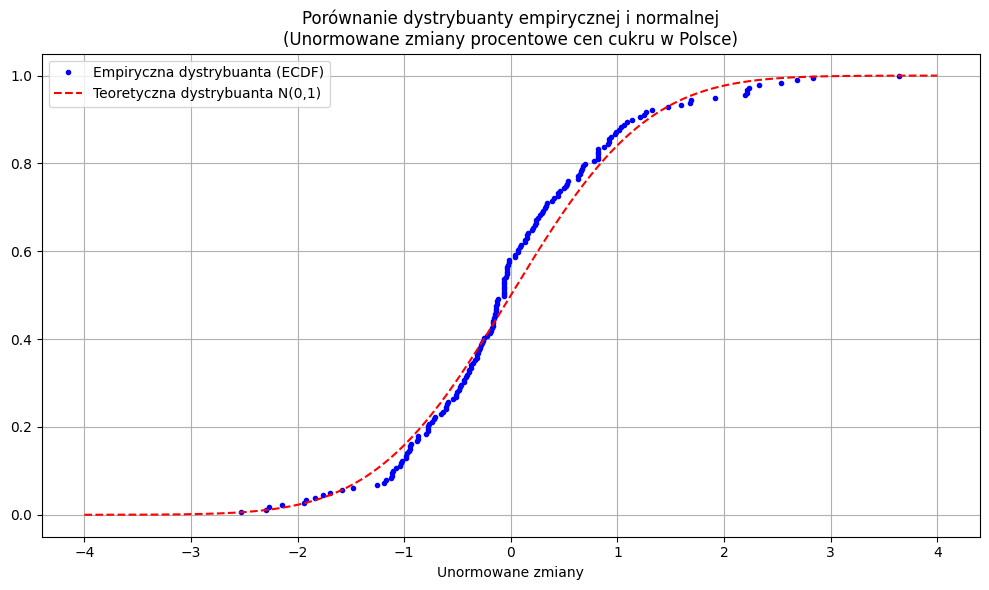

In [25]:
# Unormowanie danych
zmiany_array = np.array(zmiany_procentowe)
zmiany_z = (zmiany_array - np.mean(zmiany_array)) / np.std(zmiany_array)

# Obliczenie ECDF unormowanych danych
sorted_z = np.sort(zmiany_z)
ecdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Teoretyczna dystrybuanta normalna
z_vals = np.linspace(-4, 4, 500)
normal_cdf = norm.cdf(z_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_z, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta (ECDF)', color='blue')
plt.plot(z_vals, normal_cdf, linestyle='--', label='Teoretyczna dystrybuanta N(0,1)', color='red')
plt.title('Porównanie dystrybuanty empirycznej i normalnej\n(Unormowane zmiany procentowe cen cukru w Polsce)')
plt.xlabel('Unormowane zmiany')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
print("=== Test Shapiro-Wilka ===")
stat, p = shapiro(zmiany_procentowe)
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

print("=== Test Kołmogorowa-Lillieforsa ===")
stat, p = lilliefors(zmiany_procentowe, dist='norm')
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

=== Test Shapiro-Wilka ===
Statystyka: 0.9714, p-value: 0.0010
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.

=== Test Kołmogorowa-Lillieforsa ===
Statystyka: 0.0883, p-value: 0.0028
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.



#### Testowanie na t-studenta

Dopasowane parametry rozkładu t:
 - df: 4.45
 - loc: 0.0275
 - scale: 7.7586

Test KS dla rozkładu t:
 - Statystyka: 0.0603, p-value: 0.5148
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.


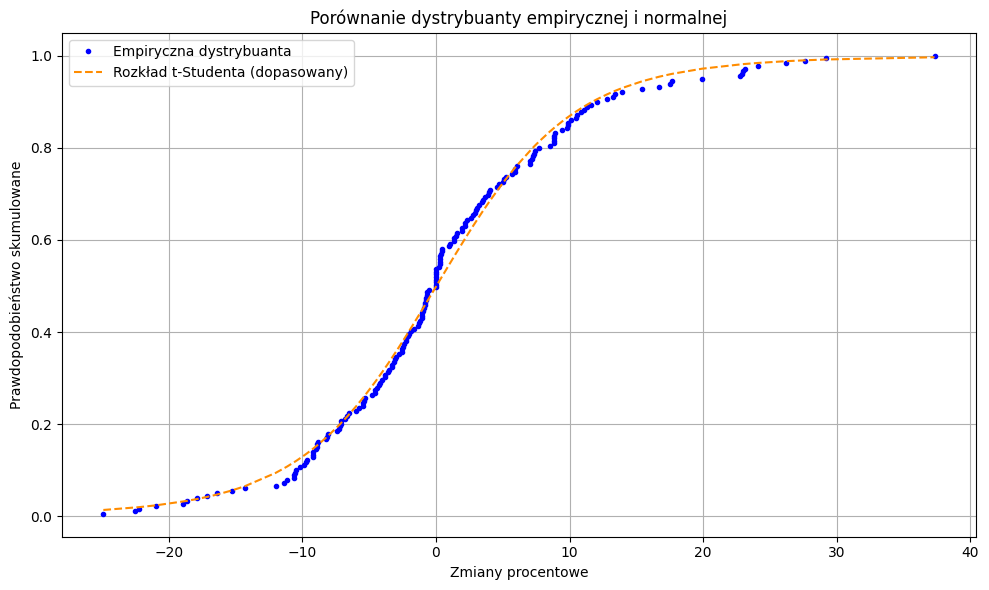

In [27]:
# Unormowane dane lub oryginalne zmiany procentowe:
data = np.array(zmiany_procentowe)

# Dopasuj rozkład t: zwraca df, loc, scale
df_fit, loc_fit, scale_fit = t.fit(data)
print(f"Dopasowane parametry rozkładu t:\n - df: {df_fit:.2f}\n - loc: {loc_fit:.4f}\n - scale: {scale_fit:.4f}")

# Test Kolmogorova-Smirnova
ks_stat, ks_p = kstest(data, 't', args=(df_fit, loc_fit, scale_fit))
print(f"\nTest KS dla rozkładu t:\n - Statystyka: {ks_stat:.4f}, p-value: {ks_p:.4f}")
if ks_p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.")
else:
    print("Odrzucamy hipotezę – dane raczej nie pochodzą z rozkładu t-Studenta.")

# Opcjonalnie: ECDF vs dystrybuanta t-Studenta
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
cdf_t = t.cdf(sorted_data, df_fit, loc=loc_fit, scale=scale_fit)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta', color='blue')
plt.plot(sorted_data, cdf_t, linestyle='--', label='Rozkład t-Studenta (dopasowany)', color='darkorange')
plt.title('Porównanie dystrybuanty empirycznej i normalnej')
plt.xlabel('Zmiany procentowe')
plt.ylabel('Prawdopodobieństwo skumulowane')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Miary ryzyka


In [28]:
# Dla podejścia parametrycznego (rozkład t-studenta v=4.45, loc=0.0275, scale=7.7586)
# Parametry dopasowanego rozkładu t
df = 4.45
loc = 0.0275
scale = 7.7586

mean = t.mean(df, loc=loc, scale=scale)
print(f"Średnia: {mean:.4f}\n")

# 1. Miary zmienności:
std_dev = t.std(df, loc=loc, scale=scale)
var = t.var(df, loc=loc, scale=scale)
print(f"Odchylenie standardowe: {std_dev:.4f}")

# Funkcja do całkowania (|x - mu| * gęstość)
mad_integrand = lambda x: abs(x - loc) * t.pdf(x, df, loc=loc, scale=scale)
# Oblicz MAD przez całkowanie
mad, _ = quad(mad_integrand, -np.inf, np.inf)
print(f"Odchylenie przeciętne (MAD): {mad:.4f}\n")

# 2. Kwantyle
quantiles = t.ppf([0.05, 0.25, 0.5, 0.75, 0.95], df, loc=loc, scale=scale)
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles):
    print(f"Kwantyl {l}: {q:.4f}")

# 3. Rozstęp międzykwartylowy (IQR)
iqr = quantiles[4] - quantiles[2]
print(f"\nRozstęp międzykwartylowy (IQR): {iqr:.4f}")

# 4. Prawdopodobieństwo przekroczenia progu
prog = 0  # wartość referencyjna - 0%
p_above = t.cdf(prog, df, loc=loc, scale=scale)
print(f"\nWartość dystrybuanty w 0: {p_above:.4%}")

Średnia: 0.0275

Odchylenie standardowe: 10.4564
Odchylenie przeciętne (MAD): 7.5520

Kwantyl 5%: -16.0436
Kwantyl 25%: -5.6639
Kwantyl 50% (mediana): 0.0275
Kwantyl 75%: 5.7189
Kwantyl 95%: 16.0986

Rozstęp międzykwartylowy (IQR): 16.0711

Wartość dystrybuanty w 0: 49.8663%


### Podejście nieparametryczne

In [29]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}")

Średnia (z próbki): 0.6390
Odchylenie standardowe (z próbki): 10.1006
Odchylenie przeciętne (z próbki): 7.4474

Kwantyl (z próbki) 5%: -15.3825
Kwantyl (z próbki) 25%: -5.3648
Kwantyl (z próbki) 50% (mediana): 0.0000
Kwantyl (z próbki) 75%: 5.8932
Kwantyl (z próbki) 95%: 20.2055

Rozstęp międzykwartylowy (IQR, z próbki): 16.0711

Wartość dystrybuanty empirycznej w 0 (z próbki): 46.3687%


## Dla cen ziemniaka:

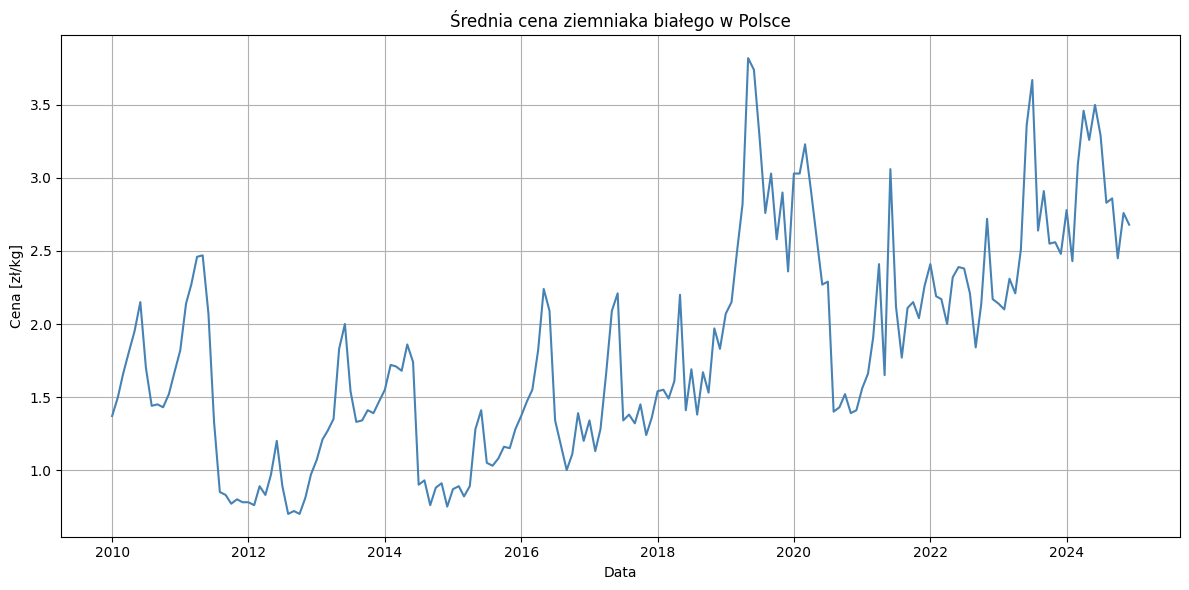

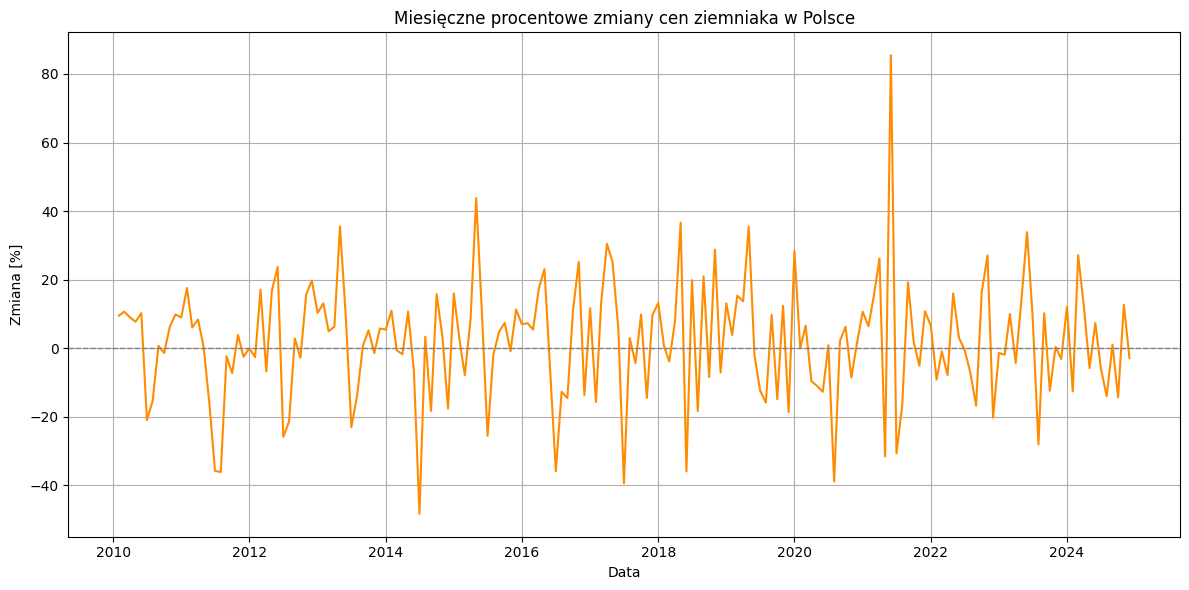

In [39]:
# Rysowanie wykresu notowań
plt.figure(figsize=(12, 6))
plt.plot(daty_ziemniak, dane_ziemniak, linestyle='-', color='steelblue')
plt.title('Średnia cena ziemniaka białego w Polsce')
plt.xlabel('Data')
plt.ylabel('Cena [zł/kg]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_ziemniak).pct_change().dropna() * 100
daty_zmian = daty_cukier[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.plot(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Miesięczne procentowe zmiany cen ziemniaka w Polsce')
plt.xlabel('Data')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Podejście parametryczne


#### Testy normalności

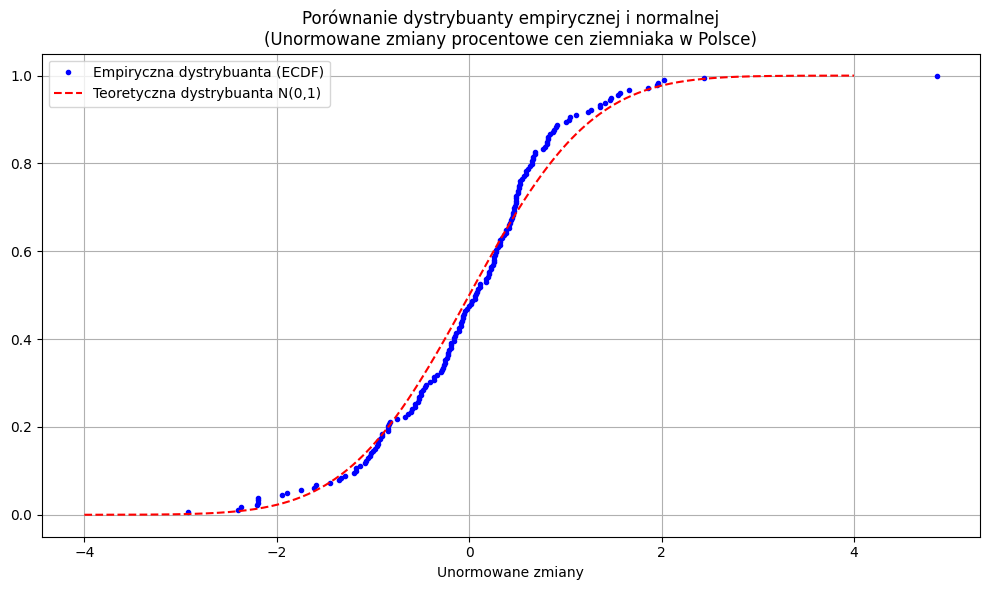

In [31]:
# Unormowanie danych
zmiany_array = np.array(zmiany_procentowe)
zmiany_z = (zmiany_array - np.mean(zmiany_array)) / np.std(zmiany_array)

# Obliczenie ECDF unormowanych danych
sorted_z = np.sort(zmiany_z)
ecdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Teoretyczna dystrybuanta normalna
z_vals = np.linspace(-4, 4, 500)
normal_cdf = norm.cdf(z_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_z, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta (ECDF)', color='blue')
plt.plot(z_vals, normal_cdf, linestyle='--', label='Teoretyczna dystrybuanta N(0,1)', color='red')
plt.title('Porównanie dystrybuanty empirycznej i normalnej\n(Unormowane zmiany procentowe cen ziemniaka w Polsce)')
plt.xlabel('Unormowane zmiany')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
print("=== Test Shapiro-Wilka ===")
stat, p = shapiro(zmiany_procentowe)
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

print("=== Test Kołmogorowa-Lillieforsa ===")
stat, p = lilliefors(zmiany_procentowe, dist='norm')
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

=== Test Shapiro-Wilka ===
Statystyka: 0.9626, p-value: 0.0001
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.

=== Test Kołmogorowa-Lillieforsa ===
Statystyka: 0.0728, p-value: 0.0304
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.



#### Testowanie na t-studenta

Dopasowane parametry rozkładu t:
 - df: 5.06
 - loc: 2.2911
 - scale: 13.4500

Test KS dla rozkładu t:
 - Statystyka: 0.0488, p-value: 0.7688
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.


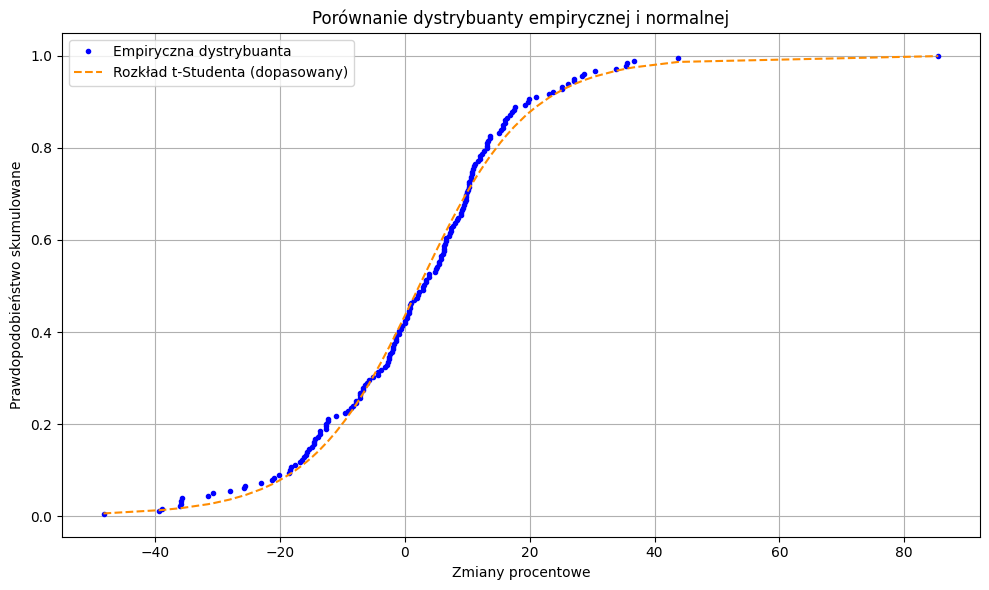

In [33]:
# Unormowane dane lub oryginalne zmiany procentowe:
data = np.array(zmiany_procentowe)

# Dopasuj rozkład t: zwraca df, loc, scale
df_fit, loc_fit, scale_fit = t.fit(data)
print(f"Dopasowane parametry rozkładu t:\n - df: {df_fit:.2f}\n - loc: {loc_fit:.4f}\n - scale: {scale_fit:.4f}")

# Test Kolmogorova-Smirnova
ks_stat, ks_p = kstest(data, 't', args=(df_fit, loc_fit, scale_fit))
print(f"\nTest KS dla rozkładu t:\n - Statystyka: {ks_stat:.4f}, p-value: {ks_p:.4f}")
if ks_p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.")
else:
    print("Odrzucamy hipotezę – dane raczej nie pochodzą z rozkładu t-Studenta.")

# Opcjonalnie: ECDF vs dystrybuanta t-Studenta
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
cdf_t = t.cdf(sorted_data, df_fit, loc=loc_fit, scale=scale_fit)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta', color='blue')
plt.plot(sorted_data, cdf_t, linestyle='--', label='Rozkład t-Studenta (dopasowany)', color='darkorange')
plt.title('Porównanie dystrybuanty empirycznej i normalnej')
plt.xlabel('Zmiany procentowe')
plt.ylabel('Prawdopodobieństwo skumulowane')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Miary ryzyka


In [34]:
# Dla podejścia parametrycznego (rozkład t-studenta v=5.06, loc=2.2911, scale=13.4500)
# Parametry dopasowanego rozkładu t
df = 5.06
loc = 2.2911
scale = 13.4500

mean = t.mean(df, loc=loc, scale=scale)
print(f"Średnia: {mean:.4f}\n")

# 1. Miary zmienności:
std_dev = t.std(df, loc=loc, scale=scale)
var = t.var(df, loc=loc, scale=scale)
print(f"Odchylenie standardowe: {std_dev:.4f}")

# Funkcja do całkowania (|x - mu| * gęstość)
mad_integrand = lambda x: abs(x - loc) * t.pdf(x, df, loc=loc, scale=scale)
# Oblicz MAD przez całkowanie
mad, _ = quad(mad_integrand, -np.inf, np.inf)
print(f"Odchylenie przeciętne (MAD): {mad:.4f}\n")

# 2. Kwantyle
quantiles = t.ppf([0.05, 0.25, 0.5, 0.75, 0.95], df, loc=loc, scale=scale)
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles):
    print(f"Kwantyl {l}: {q:.4f}")

# 3. Rozstęp międzykwartylowy (IQR)
iqr = quantiles[4] - quantiles[2]
print(f"\nRozstęp międzykwartylowy (IQR): {iqr:.4f}")

# 4. Prawdopodobieństwo przekroczenia progu
prog = 0  # wartość referencyjna - 0%
p_above = t.cdf(prog, df, loc=loc, scale=scale)
print(f"\nWartość dystrybuanty w 0: {p_above:.4%}")

Średnia: 2.2911

Odchylenie standardowe: 17.2956
Odchylenie przeciętne (MAD): 12.7340

Kwantyl 5%: -24.7405
Kwantyl 25%: -7.4740
Kwantyl 50% (mediana): 2.2911
Kwantyl 75%: 12.0562
Kwantyl 95%: 29.3227

Rozstęp międzykwartylowy (IQR): 27.0316

Wartość dystrybuanty w 0: 43.5672%


### Podejście nieparametryczne

In [35]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}")

Średnia (z próbki): 1.8737
Odchylenie standardowe (z próbki): 17.2219
Odchylenie przeciętne (z próbki): 12.7775

Kwantyl (z próbki) 5%: -28.3308
Kwantyl (z próbki) 25%: -7.5315
Kwantyl (z próbki) 50% (mediana): 3.0172
Kwantyl (z próbki) 75%: 10.8760
Kwantyl (z próbki) 95%: 27.2834

Rozstęp międzykwartylowy (IQR, z próbki): 27.0316

Wartość dystrybuanty empirycznej w 0 (z próbki): 57.5419%


## Dla danych dot. otyłości:

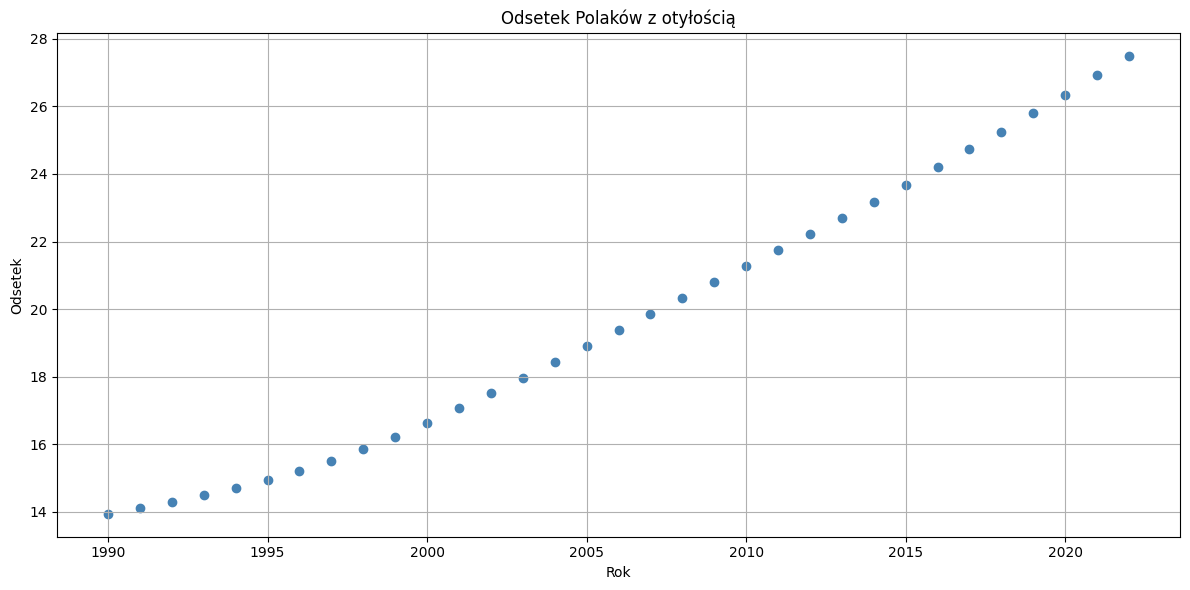

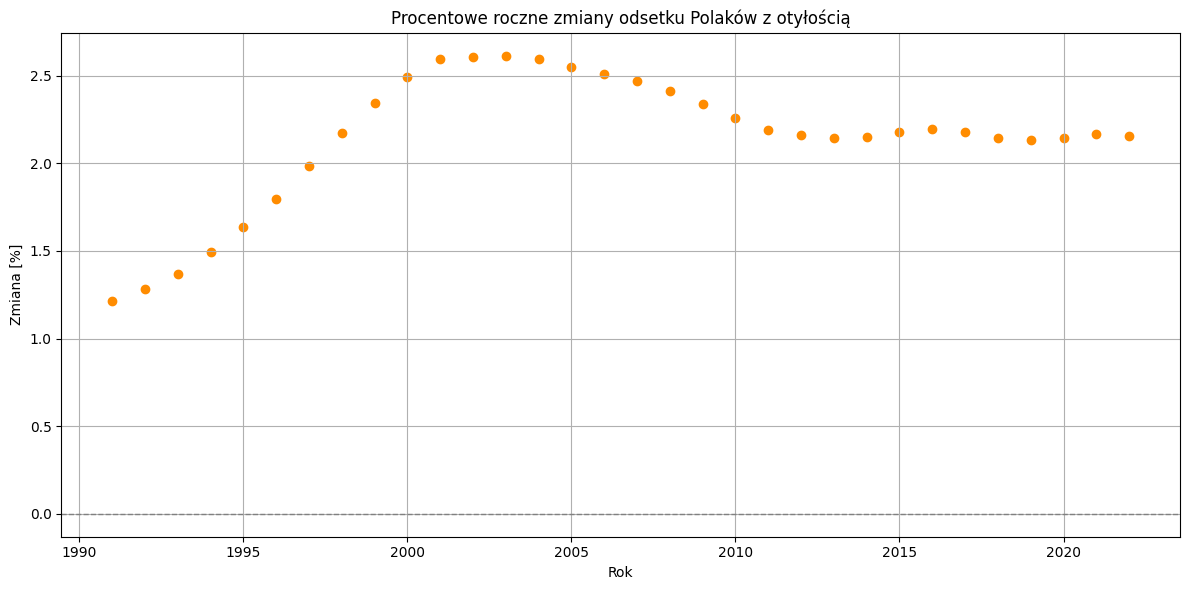

In [36]:
# Rysowanie wykresu notowań
plt.figure(figsize=(12, 6))
plt.scatter(daty_otylosc, dane_otylosc, linestyle='-', color='steelblue')
plt.title('Odsetek Polaków z otyłością')
plt.xlabel('Rok')
plt.ylabel('Odsetek')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_otylosc).pct_change().dropna() * 100
daty_zmian = daty_otylosc[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.scatter(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Procentowe roczne zmiany odsetku Polaków z otyłością')
plt.xlabel('Rok')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

Ze względu na małą próbkę oraz brak zauważalnego schematu, skorzystamy jedynie z podejścia nieparametrycznego.

In [37]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = 1-np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}") # nie było sytuacji, w której procent otyłych Polaków zmalał

Średnia (z próbki): 2.1461
Odchylenie standardowe (z próbki): 0.3839
Odchylenie przeciętne (z próbki): 0.2664

Kwantyl (z próbki) 5%: 1.3315
Kwantyl (z próbki) 25%: 2.1407
Kwantyl (z próbki) 50% (mediana): 2.1748
Kwantyl (z próbki) 75%: 2.4255
Kwantyl (z próbki) 95%: 2.6008

Rozstęp międzykwartylowy (IQR, z próbki): 27.0316

Wartość dystrybuanty empirycznej w 0 (z próbki): 0.0000%


## Dla euro:

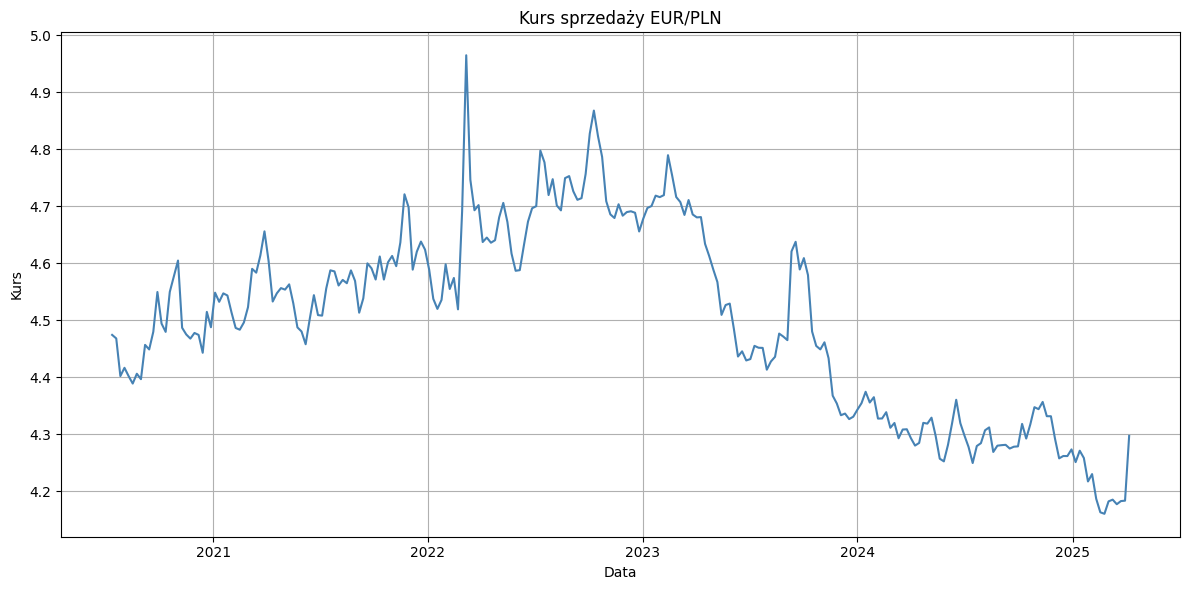

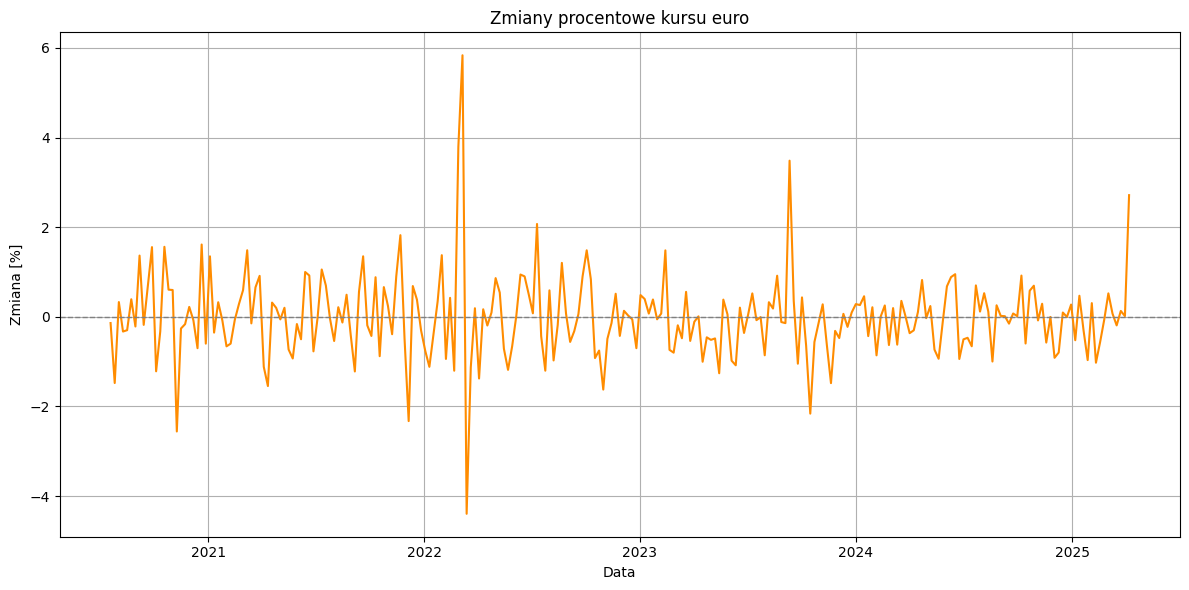

In [38]:
# Rysowanie wykresu notowań
plt.figure(figsize=(12, 6))
plt.plot(daty_waluty, dane_euro, linestyle='-', color='steelblue')
plt.title('Kurs sprzedaży EUR/PLN')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_euro).pct_change().dropna() * 100
zmiany_procentowe_euro = zmiany_procentowe
daty_zmian = daty_waluty[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.plot(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Zmiany procentowe kursu euro')
plt.xlabel('Data')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Podejście parametryczne


#### Testy normalności

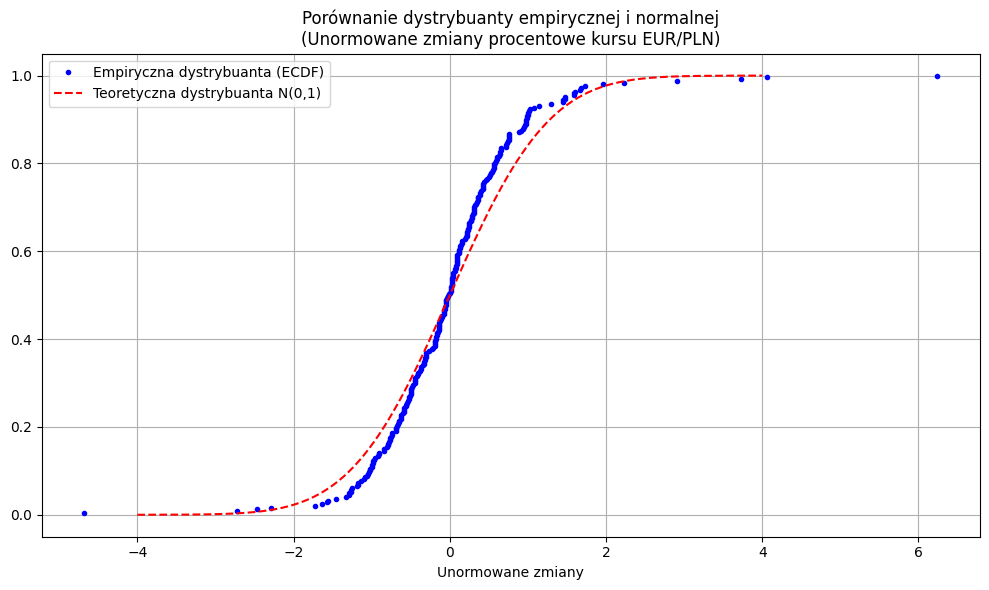

In [39]:
# Unormowanie danych
zmiany_array = np.array(zmiany_procentowe)
zmiany_z = (zmiany_array - np.mean(zmiany_array)) /np.std(zmiany_array)

# Obliczenie ECDF unormowanych danych
sorted_z = np.sort(zmiany_z)
ecdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Teoretyczna dystrybuanta normalna
z_vals = np.linspace(-4, 4, 500)
normal_cdf = norm.cdf(z_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_z, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta (ECDF)', color='blue')
plt.plot(z_vals, normal_cdf, linestyle='--', label='Teoretyczna dystrybuanta N(0,1)', color='red')
plt.title('Porównanie dystrybuanty empirycznej i normalnej\n(Unormowane zmiany procentowe kursu EUR/PLN)')
plt.xlabel('Unormowane zmiany')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
print("=== Test Shapiro-Wilka ===")
stat, p = shapiro(zmiany_procentowe)
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

print("=== Test Kołmogorowa-Lillieforsa ===")
stat, p = lilliefors(zmiany_procentowe, dist='norm')
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

=== Test Shapiro-Wilka ===
Statystyka: 0.8933, p-value: 0.0000
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.

=== Test Kołmogorowa-Lillieforsa ===
Statystyka: 0.0901, p-value: 0.0010
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.



#### Testowanie na t-studenta:

Dopasowane parametry rozkładu t:
 - df: 3.39
 - loc: -0.0518
 - scale: 0.5985

Test KS dla rozkładu t:
 - Statystyka: 0.0325, p-value: 0.9489
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.


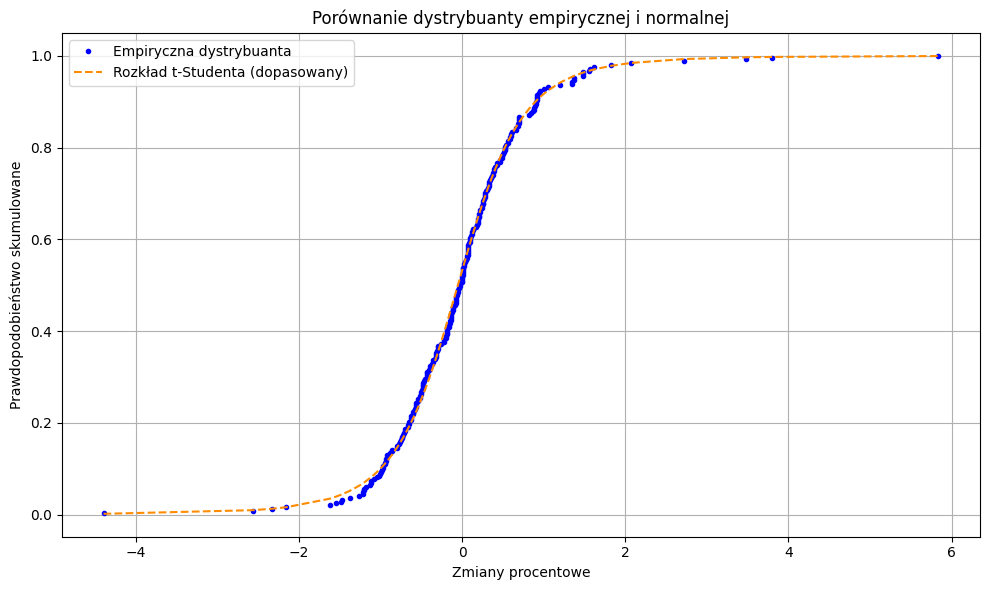

In [41]:
# Unormowane dane lub oryginalne zmiany procentowe:
data = np.array(zmiany_procentowe)

# Dopasuj rozkład t: zwraca df, loc, scale
df_fit, loc_fit, scale_fit = t.fit(data)
print(f"Dopasowane parametry rozkładu t:\n - df: {df_fit:.2f}\n - loc: {loc_fit:.4f}\n - scale: {scale_fit:.4f}")

# Test Kolmogorova-Smirnova
ks_stat, ks_p = kstest(data, 't', args=(df_fit, loc_fit, scale_fit))
print(f"\nTest KS dla rozkładu t:\n - Statystyka: {ks_stat:.4f}, p-value: {ks_p:.4f}")
if ks_p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.")
else:
    print("Odrzucamy hipotezę – dane raczej nie pochodzą z rozkładu t-Studenta.")

# Opcjonalnie: ECDF vs dystrybuanta t-Studenta
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
cdf_t = t.cdf(sorted_data, df_fit, loc=loc_fit, scale=scale_fit)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta', color='blue')
plt.plot(sorted_data, cdf_t, linestyle='--', label='Rozkład t-Studenta (dopasowany)', color='darkorange')
plt.title('Porównanie dystrybuanty empirycznej i normalnej')
plt.xlabel('Zmiany procentowe')
plt.ylabel('Prawdopodobieństwo skumulowane')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Miary ryzyka

In [42]:
# Dla podejścia parametrycznego (rozkład t-studenta v=4.45, loc=0.0275, scale=7.7586)
# Parametry dopasowanego rozkładu t
df = 4.45
loc = 0.0275
scale = 7.7586

mean = t.mean(df, loc=loc, scale=scale)
print(f"Średnia: {mean:.4f}\n")

# 1. Miary zmienności:
std_dev = t.std(df, loc=loc, scale=scale)
var = t.var(df, loc=loc, scale=scale)
print(f"Odchylenie standardowe: {std_dev:.4f}")

# Funkcja do całkowania (|x - mu| * gęstość)
mad_integrand = lambda x: abs(x - loc) * t.pdf(x, df, loc=loc, scale=scale)
# Oblicz MAD przez całkowanie
mad, _ = quad(mad_integrand, -np.inf, np.inf)
print(f"Odchylenie przeciętne (MAD): {mad:.4f}\n")

# 2. Kwantyle
quantiles = t.ppf([0.05, 0.25, 0.5, 0.75, 0.95], df, loc=loc, scale=scale)
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles):
    print(f"Kwantyl {l}: {q:.4f}")

# 3. Rozstęp międzykwartylowy (IQR)
iqr = quantiles[4] - quantiles[2]
print(f"\nRozstęp międzykwartylowy (IQR): {iqr:.4f}")

# 4. Prawdopodobieństwo przekroczenia progu
prog = 0  # wartość referencyjna - 0%
p_above = t.cdf(prog, df, loc=loc, scale=scale)
print(f"\nWartość dystrybuanty w 0: {p_above:.4%}")

Średnia: 0.0275

Odchylenie standardowe: 10.4564
Odchylenie przeciętne (MAD): 7.5520

Kwantyl 5%: -16.0436
Kwantyl 25%: -5.6639
Kwantyl 50% (mediana): 0.0275
Kwantyl 75%: 5.7189
Kwantyl 95%: 16.0986

Rozstęp międzykwartylowy (IQR): 16.0711

Wartość dystrybuanty w 0: 49.8663%


### Podejście nieparametryczne

In [43]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}")

Średnia (z próbki): -0.0120
Odchylenie standardowe (z próbki): 0.9389
Odchylenie przeciętne (z próbki): 0.6326

Kwantyl (z próbki) 5%: -1.2021
Kwantyl (z próbki) 25%: -0.5294
Kwantyl (z próbki) 50% (mediana): -0.0200
Kwantyl (z próbki) 75%: 0.3895
Kwantyl (z próbki) 95%: 1.3731

Rozstęp międzykwartylowy (IQR, z próbki): 16.0711

Wartość dystrybuanty empirycznej w 0 (z próbki): 48.5830%


## Dla CZK:

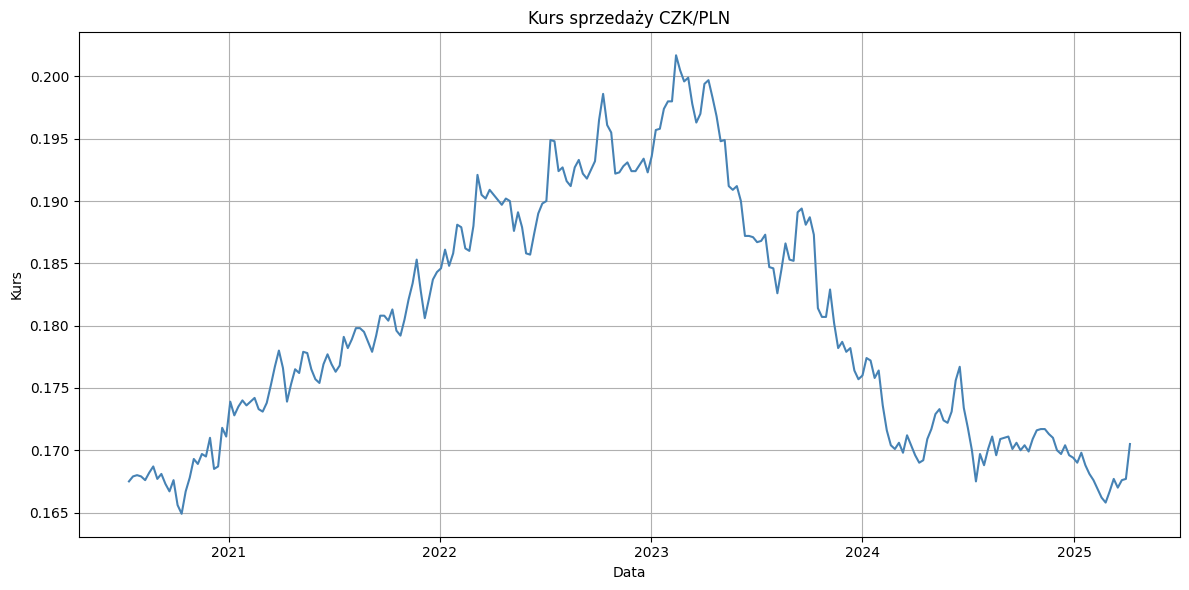

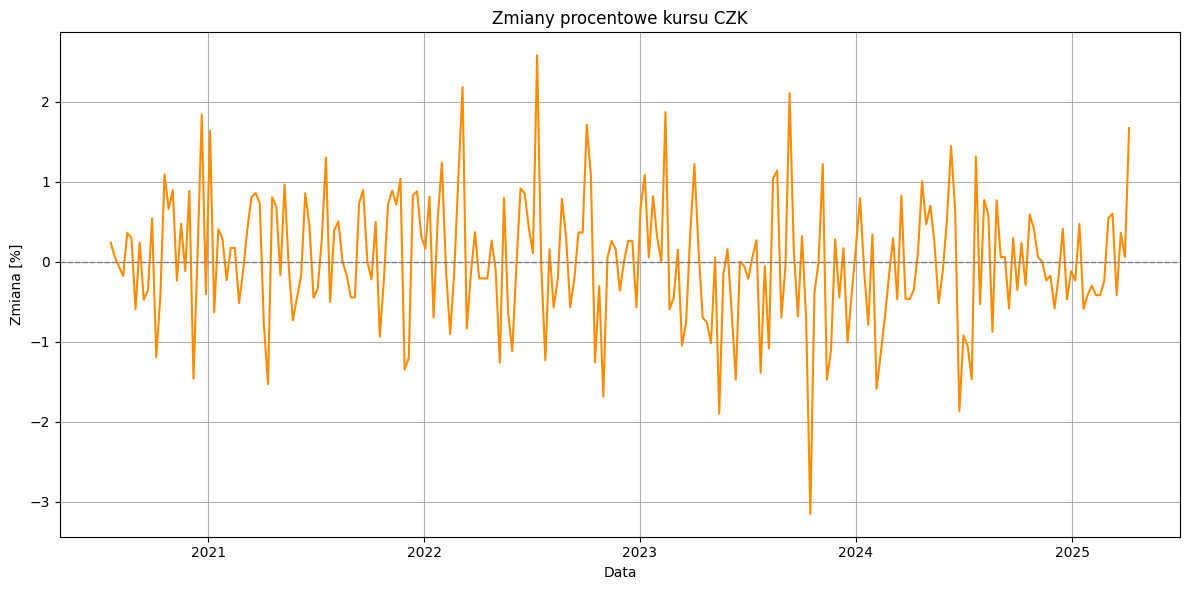

In [44]:
# Rysowanie wykresu notowań
plt.figure(figsize=(12, 6))
plt.plot(daty_waluty, dane_czk, linestyle='-', color='steelblue')
plt.title('Kurs sprzedaży CZK/PLN')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_czk).pct_change().dropna() * 100
zmiany_procentowe_czk = zmiany_procentowe
daty_zmian = daty_waluty[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.plot(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Zmiany procentowe kursu CZK')
plt.xlabel('Data')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Podejście parametryczne

#### Testy normalności

Myślę, że warto zwrócić uwagę na ten i następny przypadek, bo tu w końcu testy pokazały normalność.

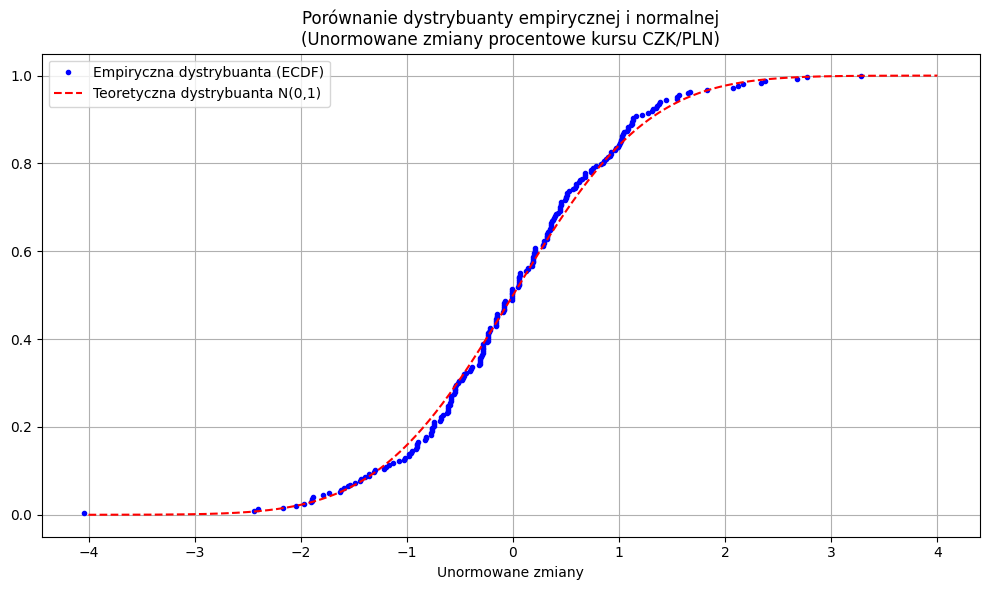

In [45]:
# Unormowanie danych
zmiany_array = np.array(zmiany_procentowe)
zmiany_z = (zmiany_array - np.mean(zmiany_array)) / np.std(zmiany_array)

# Obliczenie ECDF unormowanych danych
sorted_z = np.sort(zmiany_z)
ecdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Teoretyczna dystrybuanta normalna
z_vals = np.linspace(-4, 4, 500)
normal_cdf = norm.cdf(z_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_z, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta (ECDF)', color='blue')
plt.plot(z_vals, normal_cdf, linestyle='--', label='Teoretyczna dystrybuanta N(0,1)', color='red')
plt.title('Porównanie dystrybuanty empirycznej i normalnej\n(Unormowane zmiany procentowe kursu CZK/PLN)')
plt.xlabel('Unormowane zmiany')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
print("=== Test Shapiro-Wilka ===")
stat, p = shapiro(zmiany_procentowe)
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

print("=== Test Kołmogorowa-Lillieforsa ===")
stat, p = lilliefors(zmiany_procentowe, dist='norm')
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

=== Test Shapiro-Wilka ===
Statystyka: 0.9898, p-value: 0.0783
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.

=== Test Kołmogorowa-Lillieforsa ===
Statystyka: 0.0419, p-value: 0.4291
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.



#### Miary ryzyka

In [47]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad

# Parametry rozkładu normalnego
loc = np.mean(zmiany_array)
scale = np.std(zmiany_array)

# Średnia (dla rozkładu normalnego równa loc)
mean = norm.mean(loc=loc, scale=scale)
print(f"Średnia: {mean:.4f}\n")

# 1. Miary zmienności:
std_dev = norm.std(loc=loc, scale=scale)
var = norm.var(loc=loc, scale=scale)
print(f"Odchylenie standardowe: {std_dev:.4f}")

# Funkcja do całkowania (|x - mu| * gęstość) dla MAD
mad_integrand = lambda x: abs(x - loc) * norm.pdf(x, loc=loc, scale=scale)
mad, _ = quad(mad_integrand, -np.inf, np.inf)
print(f"Odchylenie przeciętne (MAD): {mad:.4f}\n")

# 2. Kwantyle
quantiles = norm.ppf([0.05, 0.25, 0.5, 0.75, 0.95], loc=loc, scale=scale)
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles):
    print(f"Kwantyl {l}: {q:.4f}")

# 3. Rozstęp międzykwartylowy (IQR)
iqr = quantiles[3] - quantiles[1]
print(f"\nRozstęp międzykwartylowy (IQR): {iqr:.4f}")

# 4. Prawdopodobieństwo przekroczenia progu
prog = 0  # wartość referencyjna - 0%
p_above = norm.cdf(prog, loc=loc, scale=scale)
print(f"\nWartość dystrybuanty w 0: {p_above:.4%}")


Średnia: 0.0102

Odchylenie standardowe: 0.7824
Odchylenie przeciętne (MAD): 0.6243

Kwantyl 5%: -1.2767
Kwantyl 25%: -0.5175
Kwantyl 50% (mediana): 0.0102
Kwantyl 75%: 0.5380
Kwantyl 95%: 1.2972

Rozstęp międzykwartylowy (IQR): 1.0555

Wartość dystrybuanty w 0: 49.4774%


### Podejście nieparametryczne

In [48]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}")

Średnia (z próbki): 0.0102
Odchylenie standardowe (z próbki): 0.7840
Odchylenie przeciętne (z próbki): 0.6008

Kwantyl (z próbki) 5%: -1.2619
Kwantyl (z próbki) 25%: -0.4517
Kwantyl (z próbki) 50% (mediana): 0.0000
Kwantyl (z próbki) 75%: 0.4735
Kwantyl (z próbki) 95%: 1.2180

Rozstęp międzykwartylowy (IQR, z próbki): 1.0555

Wartość dystrybuanty empirycznej w 0 (z próbki): 48.5830%


## Dla HUF:

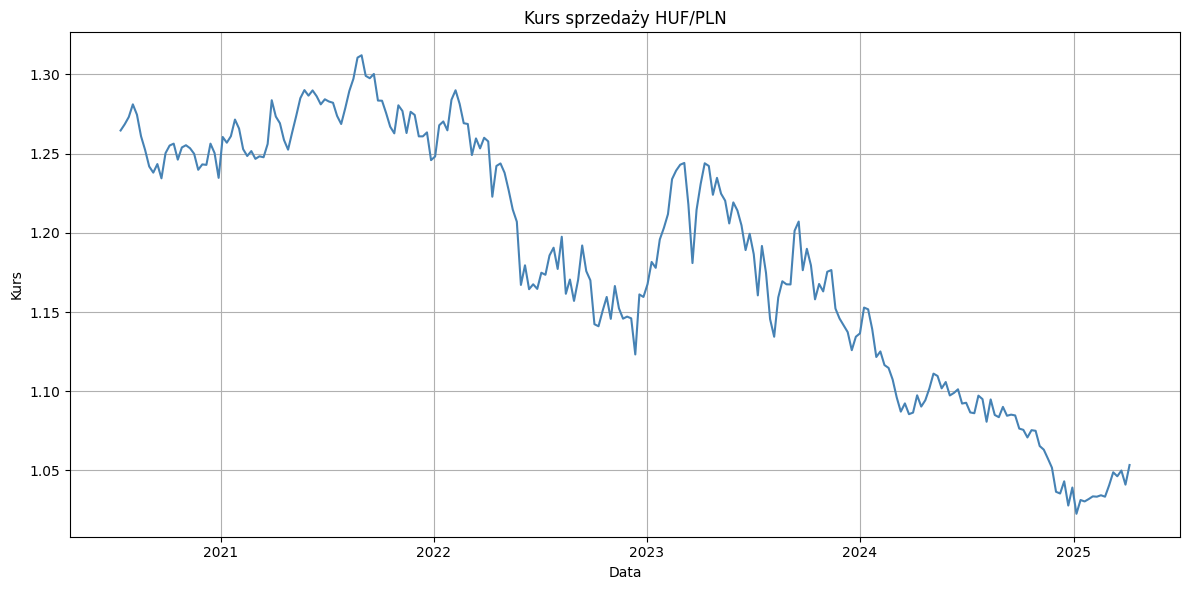

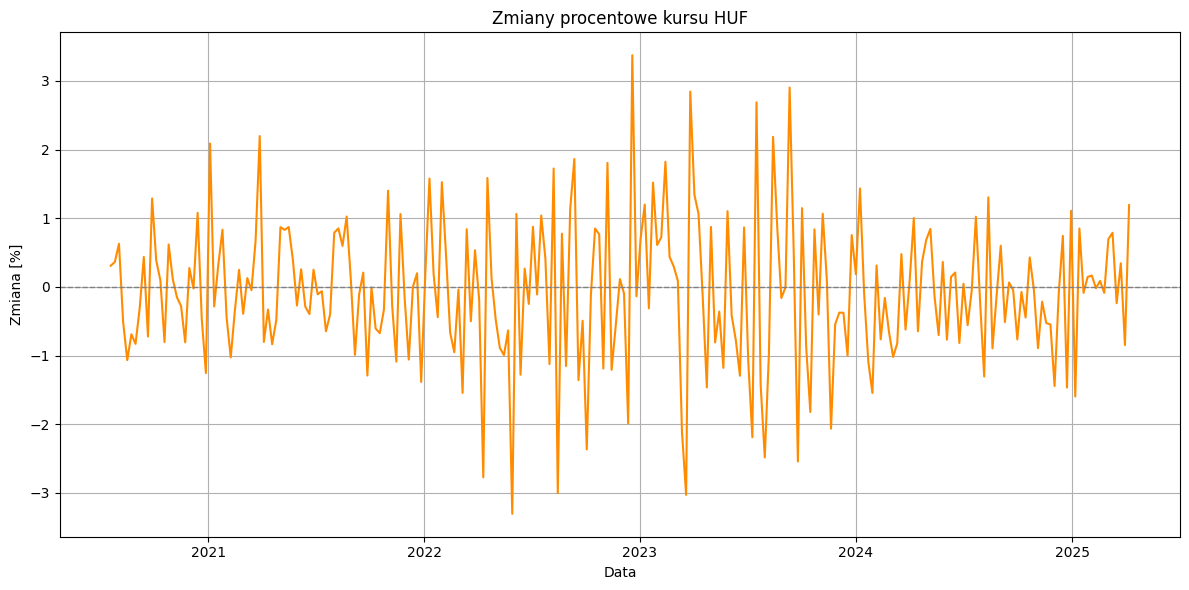

In [49]:
# Rysowanie wykresu notowań
plt.figure(figsize=(12, 6))
plt.plot(daty_waluty, dane_huf, linestyle='-', color='steelblue')
plt.title('Kurs sprzedaży HUF/PLN')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_huf).pct_change().dropna() * 100
zmiany_procentowe_huf = zmiany_procentowe
daty_zmian = daty_waluty[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.plot(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Zmiany procentowe kursu HUF')
plt.xlabel('Data')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Podejście parametryczne

#### Testy normalności

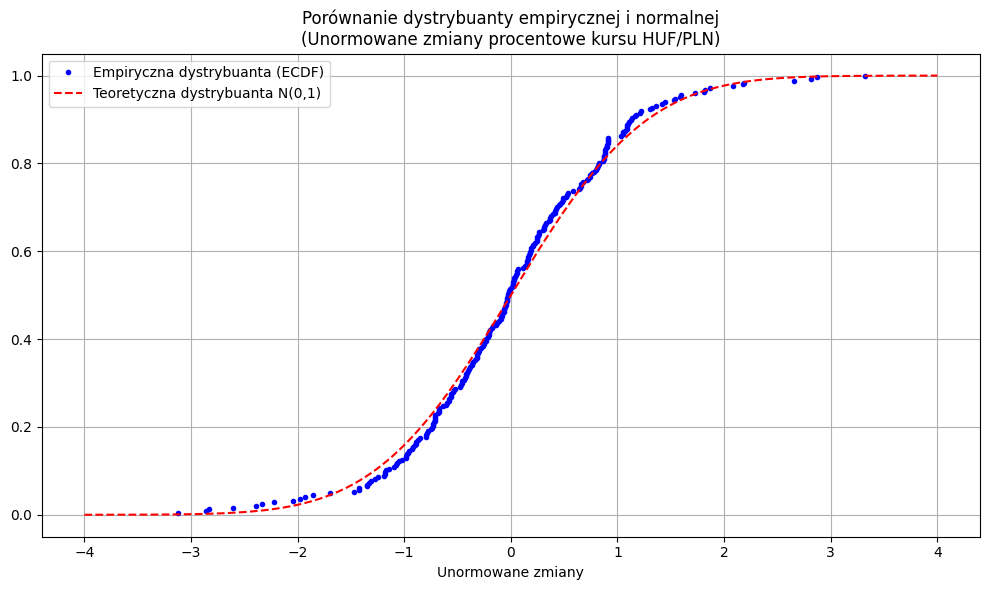

In [50]:
# Unormowanie danych
zmiany_array = np.array(zmiany_procentowe)
zmiany_z = (zmiany_array - np.mean(zmiany_array)) / np.std(zmiany_array)

# Obliczenie ECDF unormowanych danych
sorted_z = np.sort(zmiany_z)
ecdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Teoretyczna dystrybuanta normalna
z_vals = np.linspace(-4, 4, 500)
normal_cdf = norm.cdf(z_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_z, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta (ECDF)', color='blue')
plt.plot(z_vals, normal_cdf, linestyle='--', label='Teoretyczna dystrybuanta N(0,1)', color='red')
plt.title('Porównanie dystrybuanty empirycznej i normalnej\n(Unormowane zmiany procentowe kursu HUF/PLN)')
plt.xlabel('Unormowane zmiany')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
print("=== Test Shapiro-Wilka ===")
stat, p = shapiro(zmiany_procentowe)
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

print("=== Test Kołmogorowa-Lillieforsa ===")
stat, p = lilliefors(zmiany_procentowe, dist='norm')
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

=== Test Shapiro-Wilka ===
Statystyka: 0.9872, p-value: 0.0269
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.

=== Test Kołmogorowa-Lillieforsa ===
Statystyka: 0.0390, p-value: 0.5402
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.



Test Kołmogorowa-Lillieforsta jest lepszy dla dużych próbek, zatem założymy normalność danych.

#### Miary ryzyka

In [52]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad

# Parametry rozkładu normalnego
loc = np.mean(zmiany_array)
scale = np.std(zmiany_array)

# Średnia (dla rozkładu normalnego równa loc)
mean = norm.mean(loc=loc, scale=scale)
print(f"Średnia: {mean:.4f}\n")

# 1. Miary zmienności:
std_dev = norm.std(loc=loc, scale=scale)
var = norm.var(loc=loc, scale=scale)
print(f"Odchylenie standardowe: {std_dev:.4f}")

# Funkcja do całkowania (|x - mu| * gęstość) dla MAD
mad_integrand = lambda x: abs(x - loc) * norm.pdf(x, loc=loc, scale=scale)
mad, _ = quad(mad_integrand, -np.inf, np.inf)
print(f"Odchylenie przeciętne (MAD): {mad:.4f}\n")

# 2. Kwantyle
quantiles = norm.ppf([0.05, 0.25, 0.5, 0.75, 0.95], loc=loc, scale=scale)
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles):
    print(f"Kwantyl {l}: {q:.4f}")

# 3. Rozstęp międzykwartylowy (IQR)
iqr = quantiles[3] - quantiles[1]
print(f"\nRozstęp międzykwartylowy (IQR): {iqr:.4f}")

# 4. Prawdopodobieństwo przekroczenia progu
prog = 0  # wartość referencyjna - 0%
p_above = norm.cdf(prog, loc=loc, scale=scale)
print(f"\nWartość dystrybuanty w 0: {p_above:.4%}")


Średnia: -0.0686

Odchylenie standardowe: 1.0367
Odchylenie przeciętne (MAD): 0.8272

Kwantyl 5%: -1.7738
Kwantyl 25%: -0.7678
Kwantyl 50% (mediana): -0.0686
Kwantyl 75%: 0.6307
Kwantyl 95%: 1.6367

Rozstęp międzykwartylowy (IQR): 1.3985

Wartość dystrybuanty w 0: 52.6369%


### Podejście nieparametryczne

In [53]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}")

Średnia (z próbki): -0.0686
Odchylenie standardowe (z próbki): 1.0388
Odchylenie przeciętne (z próbki): 0.7858

Kwantyl (z próbki) 5%: -1.5817
Kwantyl (z próbki) 25%: -0.6964
Kwantyl (z próbki) 50% (mediana): -0.0954
Kwantyl (z próbki) 75%: 0.6142
Kwantyl (z próbki) 95%: 1.5626

Rozstęp międzykwartylowy (IQR, z próbki): 1.3985

Wartość dystrybuanty empirycznej w 0 (z próbki): 44.1296%


# Miary ryzyka dla przypadku wielowymiarowego

Analizujemy zmienność portfela walut przez zmienność rozkładu jednowymiarowego dla liniowej kombinacji składników. Wagi 0.5, 0.25, 0.25.

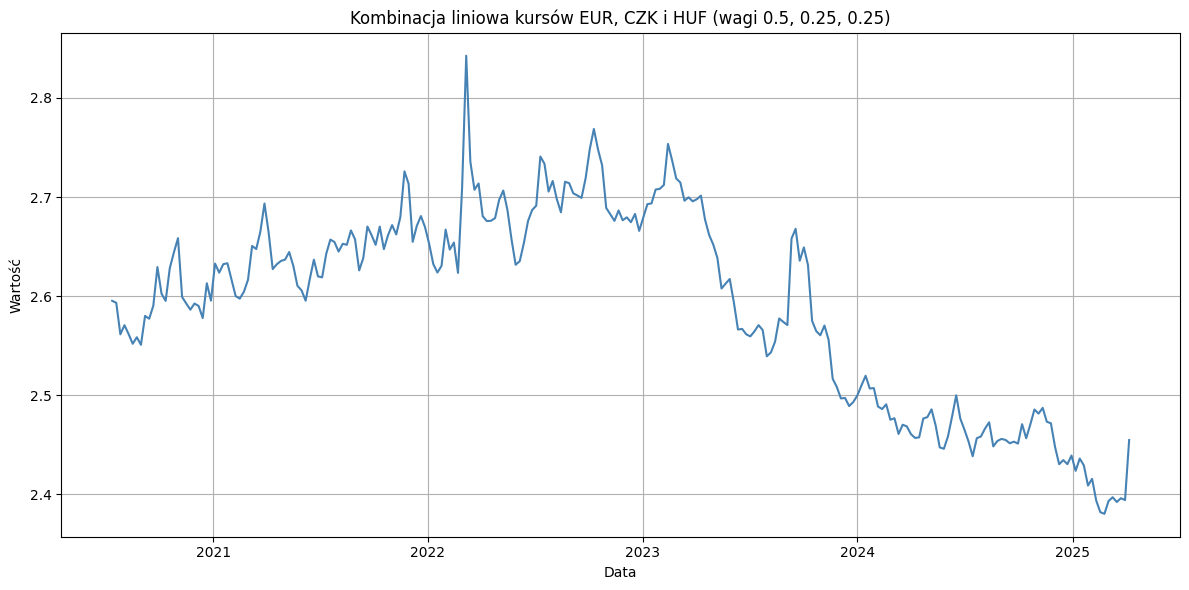

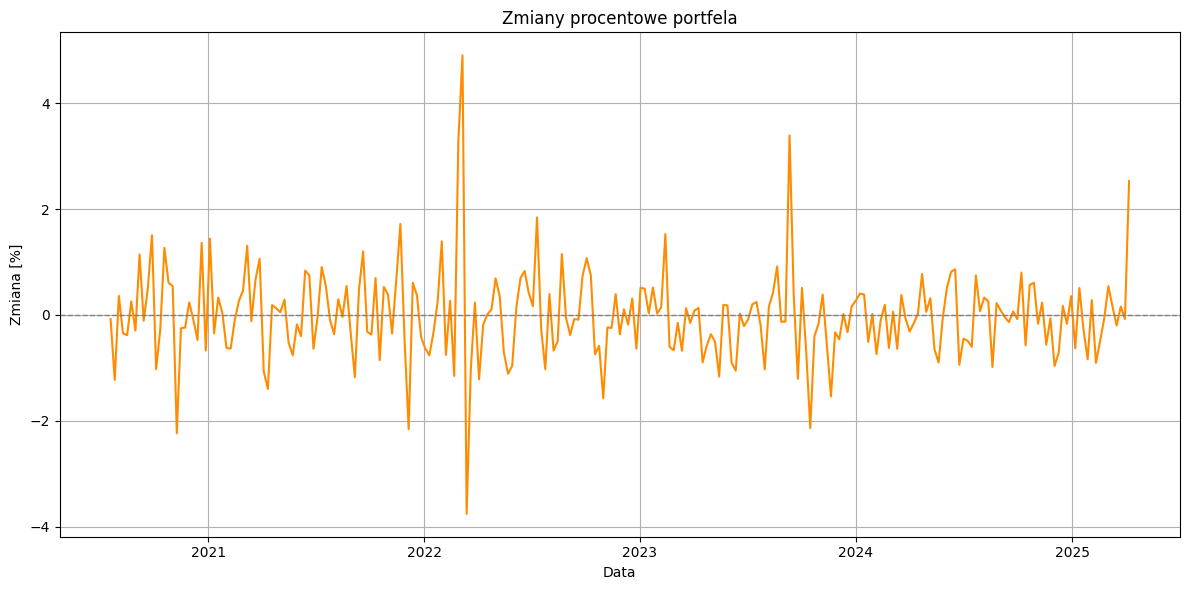

In [54]:
# Rysowanie wykresu notowań
# dane_waluty - portfel
plt.figure(figsize=(12, 6))
plt.plot(daty_waluty, dane_waluty, linestyle='-', color='steelblue')
plt.title('Kombinacja liniowa kursów EUR, CZK i HUF (wagi 0.5, 0.25, 0.25)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.grid(True)
plt.tight_layout()
plt.show()

# Obliczanie tygodniowych zmian procentowych
zmiany_procentowe = Series(dane_waluty).pct_change().dropna() * 100
daty_zmian = daty_waluty[1:]  # pierwszy tydzień nie ma zmiany

# Rysowanie wykresu zmian procentowych
plt.figure(figsize=(12, 6))
plt.plot(daty_zmian, zmiany_procentowe, linestyle='-', color='darkorange')
plt.title('Zmiany procentowe portfela')
plt.xlabel('Data')
plt.ylabel('Zmiana [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Podejście parametryczne

#### Testy normalności

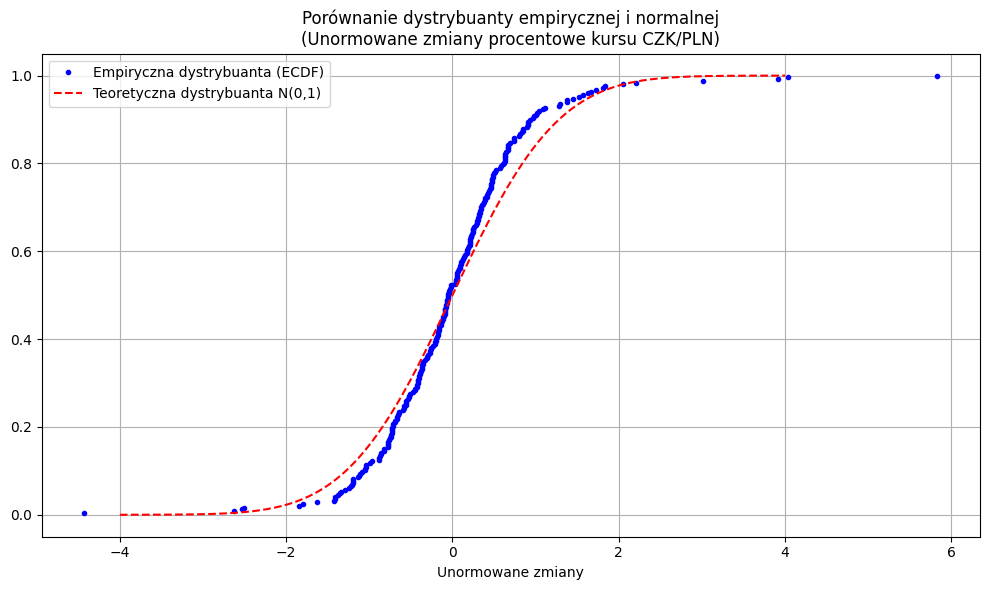

In [55]:
# Unormowanie danych
zmiany_array = np.array(zmiany_procentowe)
zmiany_z = (zmiany_array - np.mean(zmiany_array)) / np.std(zmiany_array)

# Obliczenie ECDF unormowanych danych
sorted_z = np.sort(zmiany_z)
ecdf = np.arange(1, len(sorted_z) + 1) / len(sorted_z)

# Teoretyczna dystrybuanta normalna
z_vals = np.linspace(-4, 4, 500)
normal_cdf = norm.cdf(z_vals)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_z, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta (ECDF)', color='blue')
plt.plot(z_vals, normal_cdf, linestyle='--', label='Teoretyczna dystrybuanta N(0,1)', color='red')
plt.title('Porównanie dystrybuanty empirycznej i normalnej\n(Unormowane zmiany procentowe kursu CZK/PLN)')
plt.xlabel('Unormowane zmiany')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
print("=== Test Shapiro-Wilka ===")
stat, p = shapiro(zmiany_procentowe)
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

print("=== Test Kołmogorowa-Lillieforsa ===")
stat, p = lilliefors(zmiany_procentowe, dist='norm')
print(f"Statystyka: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu normalnego.\n")
else:
    print("Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.\n")

=== Test Shapiro-Wilka ===
Statystyka: 0.9069, p-value: 0.0000
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.

=== Test Kołmogorowa-Lillieforsa ===
Statystyka: 0.0941, p-value: 0.0010
Odrzucamy hipotezę o normalności – dane prawdopodobnie nie są normalne.



#### Testowanie na t-studenta

Dopasowane parametry rozkładu t:
 - df: 3.45
 - loc: -0.0509
 - scale: 0.5511

Test KS dla rozkładu t:
 - Statystyka: 0.0270, p-value: 0.9918
Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.


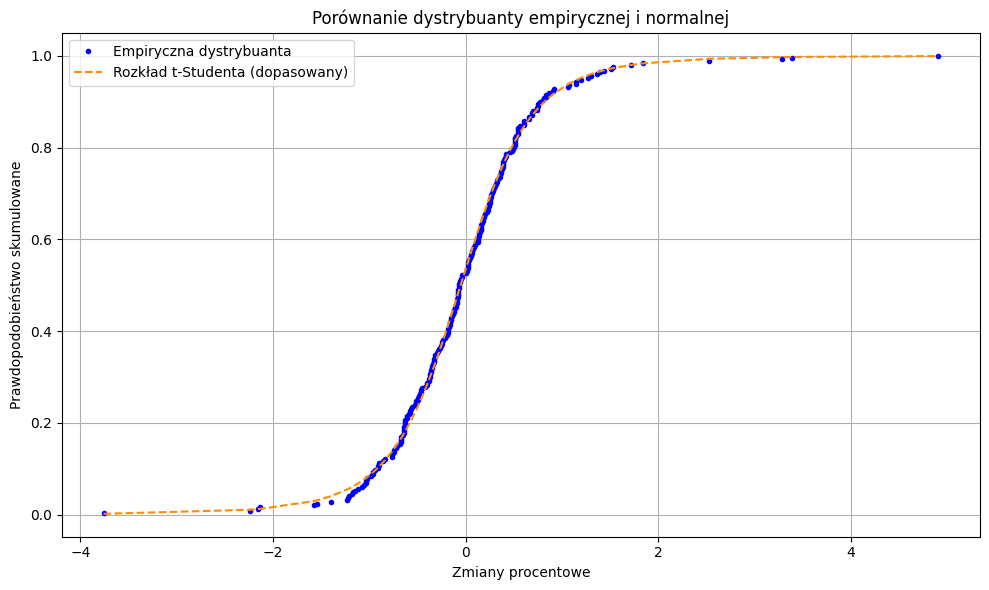

In [57]:
# Unormowane dane lub oryginalne zmiany procentowe:
data = np.array(zmiany_procentowe)

# Dopasuj rozkład t: zwraca df, loc, scale
df_fit, loc_fit, scale_fit = t.fit(data)
print(f"Dopasowane parametry rozkładu t:\n - df: {df_fit:.2f}\n - loc: {loc_fit:.4f}\n - scale: {scale_fit:.4f}")

# Test Kolmogorova-Smirnova
ks_stat, ks_p = kstest(data, 't', args=(df_fit, loc_fit, scale_fit))
print(f"\nTest KS dla rozkładu t:\n - Statystyka: {ks_stat:.4f}, p-value: {ks_p:.4f}")
if ks_p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – dane mogą pochodzić z rozkładu t-Studenta.")
else:
    print("Odrzucamy hipotezę – dane raczej nie pochodzą z rozkładu t-Studenta.")

# Opcjonalnie: ECDF vs dystrybuanta t-Studenta
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
cdf_t = t.cdf(sorted_data, df_fit, loc=loc_fit, scale=scale_fit)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', label='Empiryczna dystrybuanta', color='blue')
plt.plot(sorted_data, cdf_t, linestyle='--', label='Rozkład t-Studenta (dopasowany)', color='darkorange')
plt.title('Porównanie dystrybuanty empirycznej i normalnej')
plt.xlabel('Zmiany procentowe')
plt.ylabel('Prawdopodobieństwo skumulowane')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Miary ryzyka

In [58]:
# Dla podejścia parametrycznego (rozkład t-studenta v=3.45, loc=-0.0509, scale=0.5511)
# Parametry dopasowanego rozkładu t
df = 3.45
loc = -0.0509
scale = 0.5511

mean = t.mean(df, loc=loc, scale=scale)
print(f"Średnia: {mean:.4f}\n")

# 1. Miary zmienności:
std_dev = t.std(df, loc=loc, scale=scale)
var = t.var(df, loc=loc, scale=scale)
print(f"Odchylenie standardowe: {std_dev:.4f}")

# Funkcja do całkowania (|x - mu| * gęstość)
mad_integrand = lambda x: abs(x - loc) * t.pdf(x, df, loc=loc, scale=scale)
# Oblicz MAD przez całkowanie
mad, _ = quad(mad_integrand, -np.inf, np.inf)
print(f"Odchylenie przeciętne (MAD): {mad:.4f}\n")

# 2. Kwantyle
quantiles = t.ppf([0.05, 0.25, 0.5, 0.75, 0.95], df, loc=loc, scale=scale)
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles):
    print(f"Kwantyl {l}: {q:.4f}")

# 3. Rozstęp międzykwartylowy (IQR)
iqr = quantiles[4] - quantiles[2]
print(f"\nRozstęp międzykwartylowy (IQR): {iqr:.4f}")

# 4. Prawdopodobieństwo przekroczenia progu
prog = 0  # wartość referencyjna - 0%
p_above = t.cdf(prog, df, loc=loc, scale=scale)
print(f"\nWartość dystrybuanty w 0: {p_above:.4%}")

Średnia: -0.0509

Odchylenie standardowe: 0.8501
Odchylenie przeciętne (MAD): 0.5764

Kwantyl 5%: -1.2817
Kwantyl 25%: -0.4654
Kwantyl 50% (mediana): -0.0509
Kwantyl 75%: 0.3636
Kwantyl 95%: 1.1799

Rozstęp międzykwartylowy (IQR): 1.2308

Wartość dystrybuanty w 0: 53.4240%


### Podejście nieparametryczne

In [59]:
mean_sample = np.mean(zmiany_procentowe)
print(f"Średnia (z próbki): {mean_sample:.4f}")

# 1. Miary zmienności
std_sample = np.std(zmiany_procentowe, ddof=1)
print(f"Odchylenie standardowe (z próbki): {std_sample:.4f}")
var_sample = np.var(zmiany_procentowe, ddof=1)
mad_sample = np.mean(np.abs(zmiany_procentowe - mean_sample))
print(f"Odchylenie przeciętne (z próbki): {mad_sample:.4f}\n")

# 3. Kwantyle
quantiles_sample = np.percentile(zmiany_procentowe, [5, 25, 50, 75, 95])
labels = ["5%", "25%", "50% (mediana)", "75%", "95%"]
for l, q in zip(labels, quantiles_sample):
    print(f"Kwantyl (z próbki) {l}: {q:.4f}")

# 4. IQR
iqr_sample = quantiles_sample[3] - quantiles_sample[1]
print(f"\nRozstęp międzykwartylowy (IQR, z próbki): {iqr:.4f}")

# 5. Prawdopodobieństwo przekroczenia progu 0%
p_above_sample = np.mean(np.array(zmiany_procentowe) > 0)
print(f"\nWartość dystrybuanty empirycznej w 0 (z próbki): {p_above_sample:.4%}")

Średnia (z próbki): -0.0190
Odchylenie standardowe (z próbki): 0.8467
Odchylenie przeciętne (z próbki): 0.5816

Kwantyl (z próbki) 5%: -1.1406
Kwantyl (z próbki) 25%: -0.4939
Kwantyl (z próbki) 50% (mediana): -0.0637
Kwantyl (z próbki) 75%: 0.3757
Kwantyl (z próbki) 95%: 1.2488

Rozstęp międzykwartylowy (IQR, z próbki): 1.2308

Wartość dystrybuanty empirycznej w 0 (z próbki): 47.7733%


### Porównanie z wynikami z pkt. 1

In [60]:
def oblicz_miary(zmiany):
    mean_sample = np.mean(zmiany)
    std_sample = np.std(zmiany, ddof=1)
    var_sample = np.var(zmiany, ddof=1)
    mad_sample = np.mean(np.abs(zmiany - mean_sample))
    quantiles_sample = np.percentile(zmiany, [5, 25, 50, 75, 95])
    iqr_sample = quantiles_sample[3] - quantiles_sample[1]
    p_above_sample = np.mean(np.array(zmiany) > 0)
    
    return {
        "Średnia": mean_sample,
        "Odch. std.": std_sample,
        "Wariancja": var_sample,
        "Odch. przeciętne": mad_sample,
        "5%": quantiles_sample[0],
        "25%": quantiles_sample[1],
        "Mediana": quantiles_sample[2],
        "75%": quantiles_sample[3],
        "95%": quantiles_sample[4],
        "IQR": iqr_sample,
        "P(>0%)": p_above_sample
    }

# Tworzymy tabelę porównawczą
dane = {
    "Portfel": oblicz_miary(zmiany_procentowe),
    "EURO": oblicz_miary(zmiany_procentowe_euro),
    "CZK": oblicz_miary(zmiany_procentowe_czk),
    "HUF": oblicz_miary(zmiany_procentowe_huf)
}

df = DataFrame(dane)
df = df.T.round(4)

print(df)

         Średnia  Odch. std.  Wariancja  Odch. przeciętne      5%     25%  \
Portfel  -0.0190      0.8467     0.7170            0.5816 -1.1406 -0.4939   
EURO     -0.0120      0.9389     0.8815            0.6326 -1.2021 -0.5294   
CZK       0.0102      0.7840     0.6146            0.6008 -1.2619 -0.4517   
HUF      -0.0686      1.0388     1.0792            0.7858 -1.5817 -0.6964   

         Mediana     75%     95%     IQR  P(>0%)  
Portfel  -0.0637  0.3757  1.2488  0.8695  0.4777  
EURO     -0.0200  0.3895  1.3731  0.9190  0.4858  
CZK       0.0000  0.4735  1.2180  0.9252  0.4858  
HUF      -0.0954  0.6142  1.5626  1.3106  0.4413  


### Dystrybuanta wielowymiarowa

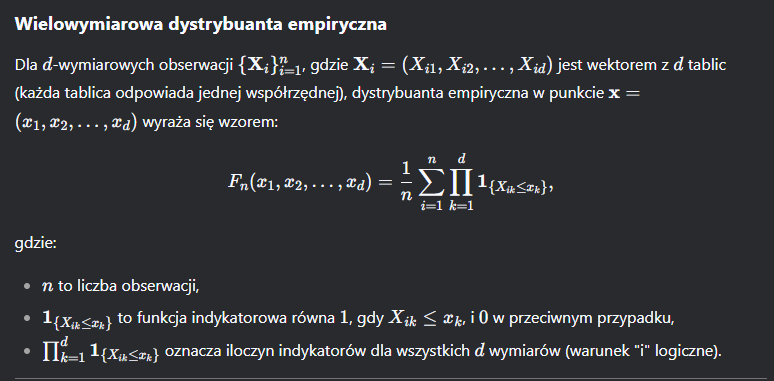

In [61]:
import numpy as np
import plotly.graph_objects as go

# Siatka progów (α1, α2, α3)
alpha1 = np.linspace(np.min(zmiany_procentowe_euro), np.max(zmiany_procentowe_euro), 20)
alpha2 = np.linspace(np.min(zmiany_procentowe_czk), np.max(zmiany_procentowe_czk), 20)
alpha3 = np.linspace(np.min(zmiany_procentowe_huf), np.max(zmiany_procentowe_huf), 20)

# Tworzymy trójwymiarową siatkę
X, Y, Z = np.meshgrid(alpha1, alpha2, alpha3, indexing='ij')
P = np.zeros_like(X)

# Obliczamy dystrybuantę empiryczną dla każdego punktu siatki
for i in range(len(alpha1)):
    for j in range(len(alpha2)):
        for k in range(len(alpha3)):
            P[i, j, k] = np.mean(
                (zmiany_procentowe_euro < alpha1[i]) &
                (zmiany_procentowe_czk < alpha2[j]) &
                (zmiany_procentowe_huf < alpha3[k])
            )

# Tworzymy wykres 3D z Plotly
fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=P.flatten(),
    isomin=0.0,
    isomax=1.0,
    opacity=0.1,
    surface_count=20,
    colorscale='Viridis',
    caps=dict(x_show=False, y_show=False, z_show=False)
))

fig.update_layout(
    title="Trójwymiarowa dystrybuanta empiryczna",
    scene=dict(
        xaxis_title='zmiany_procentowe_euro < α1',
        yaxis_title='zmiany_procentowe_czk < α2',
        zaxis_title='zmiany_procentowe_huf < α3'
    )
)

# Pokazuje wykres interaktywnie
fig.show()

# Zapis do pliku HTML
fig.write_html("dystrybuanta_3d.html")



In [62]:
# Obliczamy dystrybuantę empiryczną w danym punkcie
def dyst_wiel(e_p, c_p, h_p):
            return np.mean(
                (zmiany_procentowe_euro < e_p) &
                (zmiany_procentowe_czk < c_p) &
                (zmiany_procentowe_huf < h_p)
            )

pr_0_0_0 = dyst_wiel(0, 0, 0)
print(pr_0_0_0)

# inny wynik niż dla portfela, bo nie bierzemy pod uwagę wag

0.24696356275303644


# Ryzyko ekstremalne

## Ryzyko krachu na giełdzie firmy matki

### Dopasowanie rozkładu granicznego maksimów

In [63]:
# 1. Konwertuj indeks na datetime
zmiany_procentowe = Series(dane_notowania).pct_change().dropna() * 100
zmiany_procentowe.index = to_datetime(daty_notowania[1:])

# 2. Filtruj straty
straty = -zmiany_procentowe

# 3. Próbka M1, M2, ..., Mk = największe straty z każdego kwartału
maksima_strat = straty.resample('QE').max()

# 4. Odwracamy znak, bo chcemy mieć dodatnie wartości strat
Mn = maksima_strat.dropna().values

print(Mn)

[ 3.26143587  8.04125776  2.70189729  2.05266847  3.56285412  1.76056338
  5.20755423  1.22752755  1.78446466  2.65240456  2.51920672  4.35363917
  6.6775837   3.71443176  6.06006911  2.01771204  1.81552427  5.42081654
  2.04942291 13.11462815  4.25767414  3.97307383  2.10777923  4.28774929
  1.35289762  1.38032871  1.65007858  4.03816559  5.62489314  2.97297297
  2.07564297  3.94183801  3.92752355  3.57804161  4.6166578   2.19767509
  3.84338084  3.08781533  3.61013028  3.93957543]


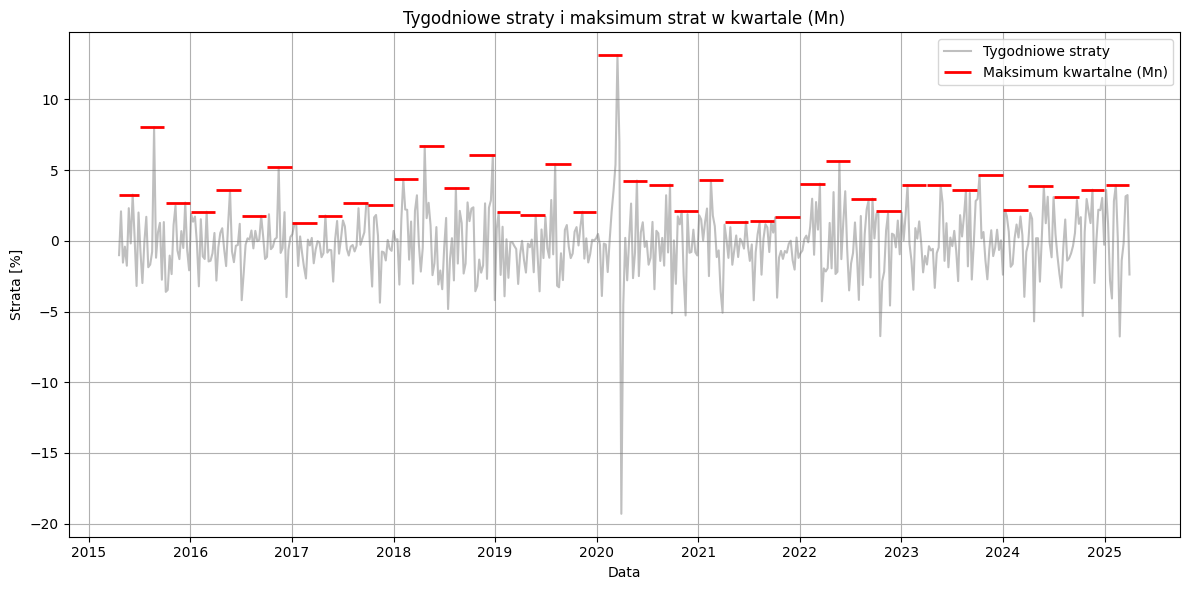

In [64]:
import matplotlib.pyplot as plt

# Upewnijmy się, że indeks to datetime
straty = straty.sort_index()

# Grupowanie po kwartale (QE)
kwartalne_bloki = list(straty.resample('QE'))

# Start wykresu
plt.figure(figsize=(12, 6))

# Szara linia - cała seria tygodniowych strat
plt.plot(straty.index, straty.values, color='gray', alpha=0.5, label='Tygodniowe straty')

# Czerwone poziome linie – maksimum strat w kwartale
for okres_konca, dane_kwartalne in kwartalne_bloki:
    if dane_kwartalne.empty:
        continue
    okres_poczatku = dane_kwartalne.index[0]
    maks_strata = dane_kwartalne.max()  # bo to są straty, więc max = największa strata
    plt.hlines(y=maks_strata, xmin=okres_poczatku, xmax=okres_konca, color='red', linewidth=2)

# Opis
plt.title("Tygodniowe straty i maksimum strat w kwartale (Mn)")
plt.xlabel("Data")
plt.ylabel("Strata [%]")
plt.grid(True)
plt.legend(["Tygodniowe straty", "Maksimum kwartalne (Mn)"])
plt.tight_layout()
plt.show()



#### Dopasowanie GEV

In [65]:
from scipy.stats import genextreme

# Dopasowanie GEV do Mn
shape, loc, scale = genextreme.fit(Mn)

print(f"Parametry dopasowanego GEV:")
print(f"  shape (ξ) = {shape:.4f}")
print(f"  loc   (μ) = {loc:.4f}")
print(f"  scale (σ) = {scale:.4f}")

Parametry dopasowanego GEV:
  shape (ξ) = -0.2191
  loc   (μ) = 2.6393
  scale (σ) = 1.2274


#### Porównanie dopasowania

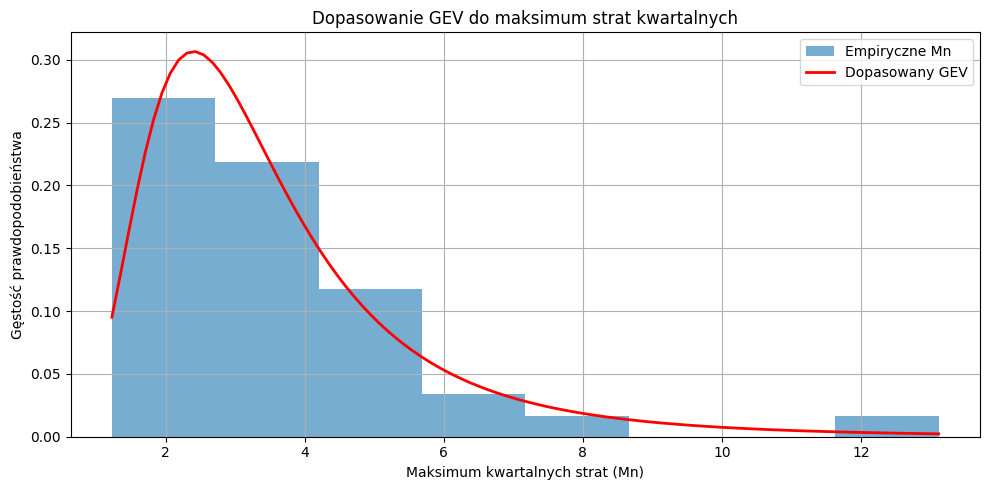

In [66]:
# Zakres x do rysowania PDF
x = np.linspace(min(Mn), max(Mn), 100)
pdf = genextreme.pdf(x, shape, loc=loc, scale=scale)

# Histogram i PDF
plt.figure(figsize=(10, 5))
plt.hist(Mn, bins=8, density=True, alpha=0.6, label='Empiryczne Mn')
plt.plot(x, pdf, 'r-', lw=2, label='Dopasowany GEV')

plt.title("Dopasowanie GEV do maksimum strat kwartalnych")
plt.xlabel("Maksimum kwartalnych strat (Mn)")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Dopasowanie rozkładu warunkowych przekroczeń

#### Wybór poziomu przekroczenia u:

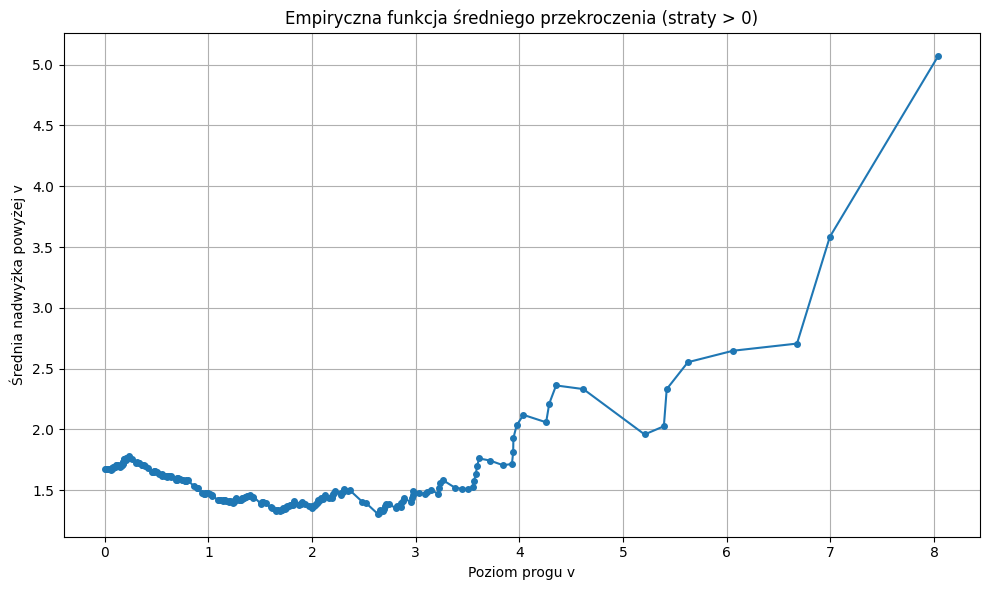

In [67]:
# Zakładamy, że straty to -zmiany_procentowe (czyli większe = większe straty)
straty_dodatnie = straty[straty > 0]  # bierzemy tylko faktyczne straty > 0

# Uporządkowana próbka strat > 0
L = np.sort(straty_dodatnie.values)

# Wyznaczanie estymatora funkcji średniego przekroczenia
x_vals = []
e_vals = []

for v in L:
    przekroczenia = L[L > v]
    if len(przekroczenia) == 0:
        continue
    srednia_nadwyzka = np.mean(przekroczenia - v)
    x_vals.append(v)
    e_vals.append(srednia_nadwyzka)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x_vals, e_vals, marker='o', linestyle='-', markersize=4)
plt.title("Empiryczna funkcja średniego przekroczenia (straty > 0)")
plt.xlabel("Poziom progu v")
plt.ylabel("Średnia nadwyżka powyżej v")
plt.grid(True)
plt.tight_layout()
plt.show()


In [68]:
prog = 3
# wybieramy u = 3 (od tego momentu wykres jest w miarę liniowy)

#### Obliczamy przekroczenia nad progiem

In [69]:
exceedances = straty[straty > prog] - prog

#### Dopasowujemy rozkład GPD

In [70]:
from scipy.stats import genpareto

# Dopasowanie GPD do przekroczeń (zakładamy loc=0)
shape_gpd, loc_gpd, scale_gpd = genpareto.fit(exceedances, floc=0)

print(f"Parametry GPD:")
print(f"  shape (ξ)  = {shape_gpd:.4f}")
print(f"  scale (σ)  = {scale_gpd:.4f}")

Parametry GPD:
  shape (ξ)  = 0.2306
  scale (σ)  = 1.1347


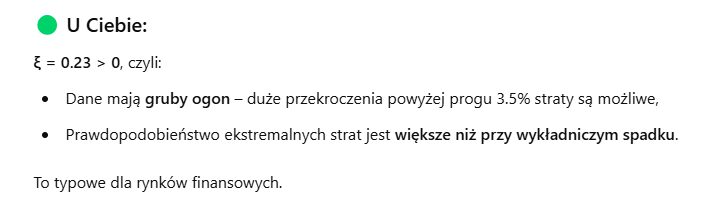

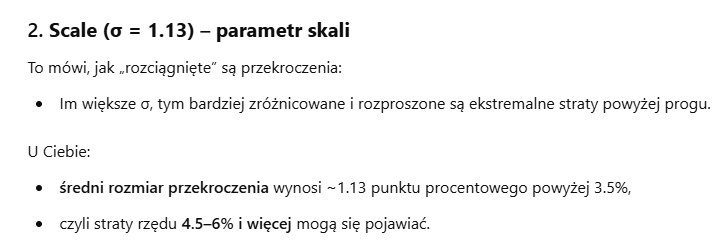

#### Wizualizacja

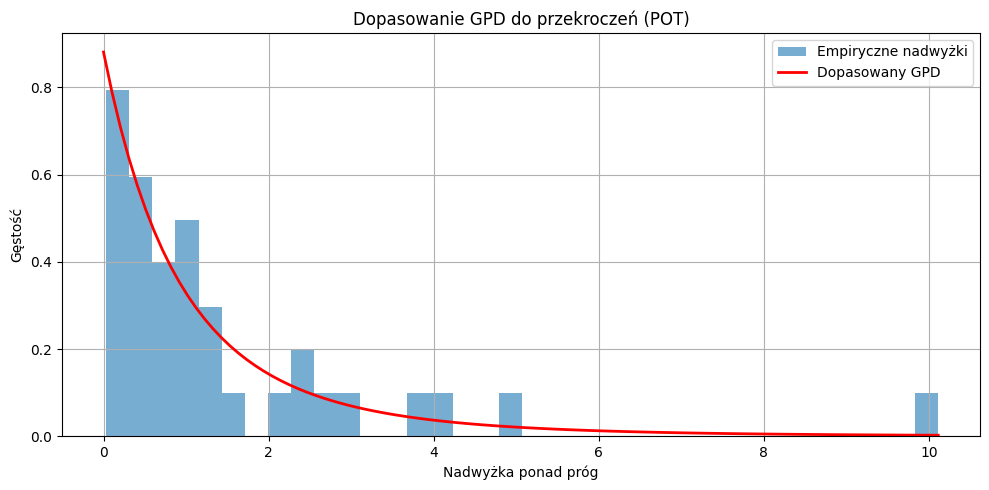

In [71]:
import matplotlib.pyplot as plt

x = np.linspace(0, exceedances.max(), 100)
pdf = genpareto.pdf(x, shape_gpd, loc=0, scale=scale_gpd)

plt.figure(figsize=(10, 5))
plt.hist(exceedances, bins=36, density=True, alpha=0.6, label='Empiryczne nadwyżki')
plt.plot(x, pdf, 'r-', lw=2, label='Dopasowany GPD')
plt.title("Dopasowanie GPD do przekroczeń (POT)")
plt.xlabel("Nadwyżka ponad próg")
plt.ylabel("Gęstość")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Ryzyko nagłego ekstremalnego wzrostu cen cukru

### Dopasowanie rozkładu granicznego maksimów

Uwaga! Tu maksimum z roku, nie z kwartału (dane są co miesiąc, nie co tydzień)

In [72]:
# 1. Konwertuj indeks na datetime
zmiany_procentowe = Series(dane_cukier).pct_change().dropna() * 100
zmiany_procentowe.index = to_datetime(daty_cukier[1:] )

# 2. Filtruj straty
straty = -zmiany_procentowe

# 3. Próbka M1, M2, ..., Mk = największe straty z każdego roku
maksima_strat = straty.resample('YE').max()

# 4. Odwracamy znak, bo chcemy mieć dodatnie wartości strat
Mn = maksima_strat.dropna().values

print(Mn)

[ 3.14685315  9.23787529  1.32275132  5.31561462 10.64814815  2.02020202
  4.18006431 14.28571429 20.96774194 11.35531136 10.18867925 18.93687708
 16.42011834 11.16207951 24.89711934]


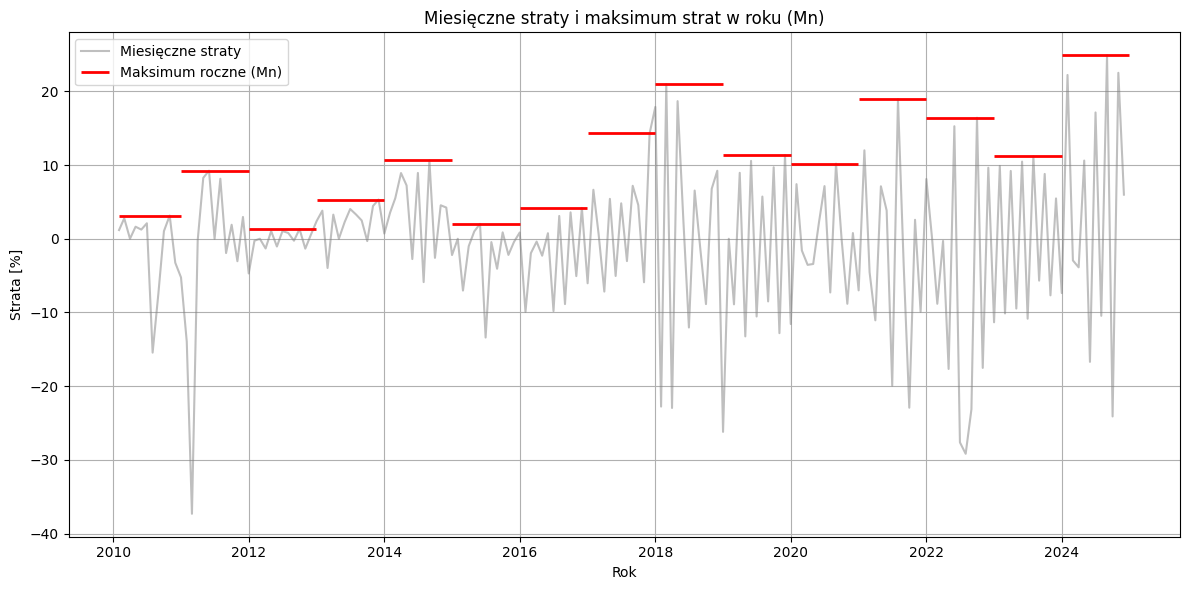

In [73]:
import matplotlib.pyplot as plt

# Upewnijmy się, że indeks to datetime
straty = straty.sort_index()

# Grupowanie po kwartale (QE)
roczne_bloki = list(straty.resample('YE'))

# Start wykresu
plt.figure(figsize=(12, 6))

# Szara linia - cała seria tygodniowych strat
plt.plot(straty.index, straty.values, color='gray', alpha=0.5, label='Tygodniowe straty')

# Czerwone poziome linie – maksimum strat w kwartale
for okres_konca, dane_roczne in roczne_bloki:
    if dane_roczne.empty:
        continue
    okres_poczatku = dane_roczne.index[0]
    maks_strata = dane_roczne.max()  # bo to są straty, więc max = największa strata
    plt.hlines(y=maks_strata, xmin=okres_poczatku, xmax=okres_konca, color='red', linewidth=2)

# Opis
plt.title("Miesięczne straty i maksimum strat w roku (Mn)")
plt.xlabel("Rok")
plt.ylabel("Strata [%]")
plt.grid(True)
plt.legend(["Miesięczne straty", "Maksimum roczne (Mn)"])
plt.tight_layout()
plt.show()

#### Dopasowanie GEV

In [74]:
from scipy.stats import genextreme

# Dopasowanie GEV do Mn
shape, loc, scale = genextreme.fit(Mn)

print(f"Parametry dopasowanego GEV:")
print(f"  shape (ξ) = {shape:.4f}")
print(f"  loc   (μ) = {loc:.4f}")
print(f"  scale (σ) = {scale:.4f}")

Parametry dopasowanego GEV:
  shape (ξ) = 0.1114
  loc   (μ) = 7.9831
  scale (σ) = 6.0301


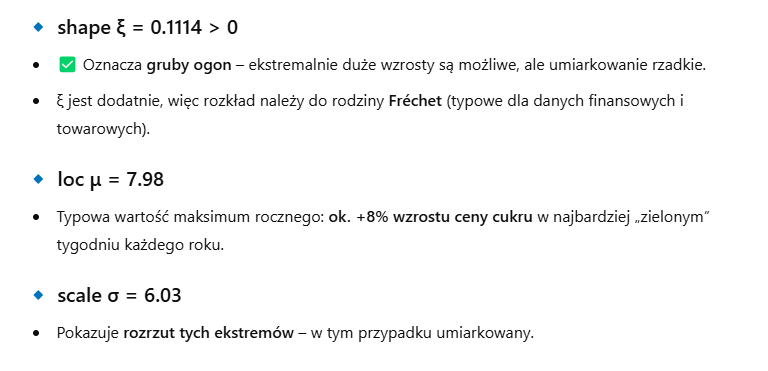

#### Porównanie dopasowania

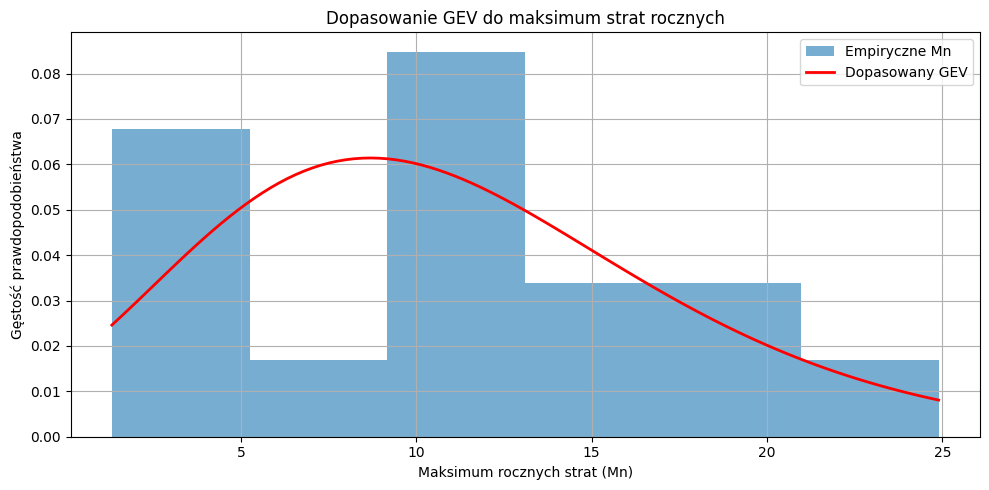

In [75]:
# Zakres x do rysowania PDF
x = np.linspace(min(Mn), max(Mn), 100)
pdf = genextreme.pdf(x, shape, loc=loc, scale=scale)

# Histogram i PDF
plt.figure(figsize=(10, 5))
plt.hist(Mn, bins=6, density=True, alpha=0.6, label='Empiryczne Mn')
plt.plot(x, pdf, 'r-', lw=2, label='Dopasowany GEV')

plt.title("Dopasowanie GEV do maksimum strat rocznych")
plt.xlabel("Maksimum rocznych strat (Mn)")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Dopasowanie rozkładu warunkowych przekroczeń

#### Wybór poziomu przekroczenia u:

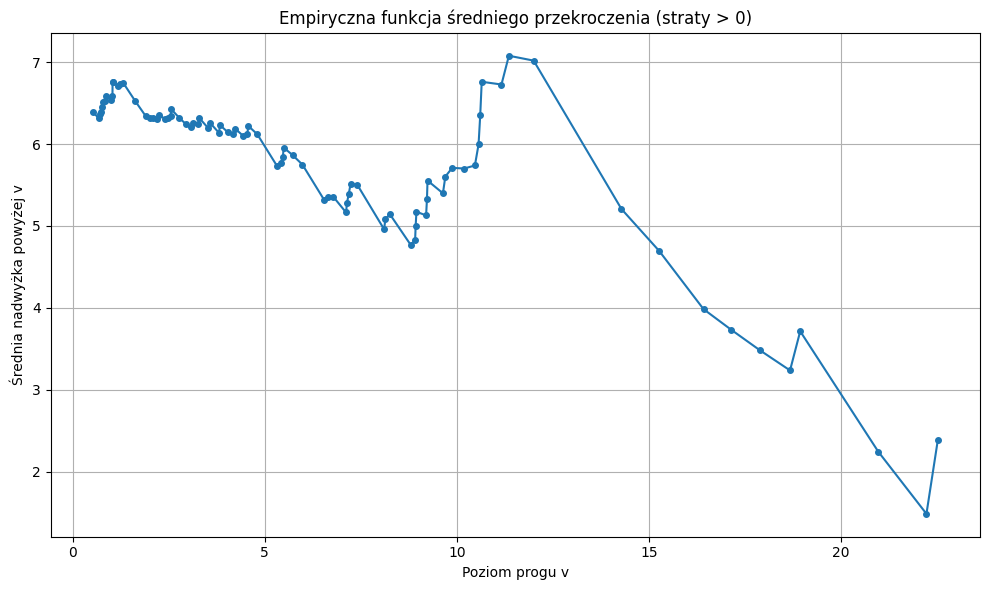

In [76]:
# Zakładamy, że straty to -zmiany_procentowe (czyli większe = większe straty)
straty_dodatnie = straty[straty > 0]  # bierzemy tylko faktyczne straty > 0

# Uporządkowana próbka strat > 0
L = np.sort(straty_dodatnie.values)

# Wyznaczanie estymatora funkcji średniego przekroczenia
x_vals = []
e_vals = []

for v in L:
    przekroczenia = L[L > v]
    if len(przekroczenia) == 0:
        continue
    srednia_nadwyzka = np.mean(przekroczenia - v)
    x_vals.append(v)
    e_vals.append(srednia_nadwyzka)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x_vals, e_vals, marker='o', linestyle='-', markersize=4)
plt.title("Empiryczna funkcja średniego przekroczenia (straty > 0)")
plt.xlabel("Poziom progu v")
plt.ylabel("Średnia nadwyżka powyżej v")
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
prog = 8
# wybieramy u = 8 (od tego momentu wykres jest w miarę liniowy)

#### Obliczamy przekroczenia nad progiem

In [78]:
exceedances = straty[straty > prog] - prog

#### Dopasowujemy rozkład GPD

In [79]:
from scipy.stats import genpareto

# Dopasowanie GPD do przekroczeń (zakładamy loc=0)
shape_gpd, loc_gpd, scale_gpd = genpareto.fit(exceedances, floc=0)

print(f"Parametry GPD:")
print(f"  shape (ξ)  = {shape_gpd:.4f}")
print(f"  scale (σ)  = {scale_gpd:.4f}")

Parametry GPD:
  shape (ξ)  = -0.0270
  scale (σ)  = 5.0458


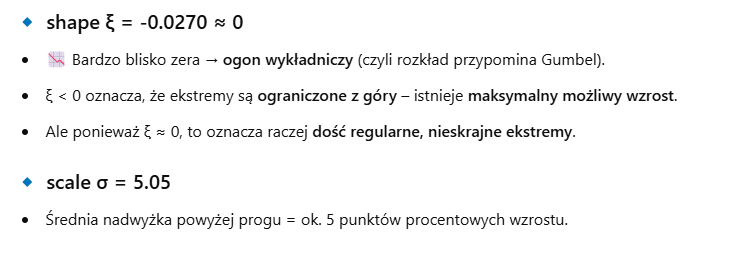

#### Wizualizacja

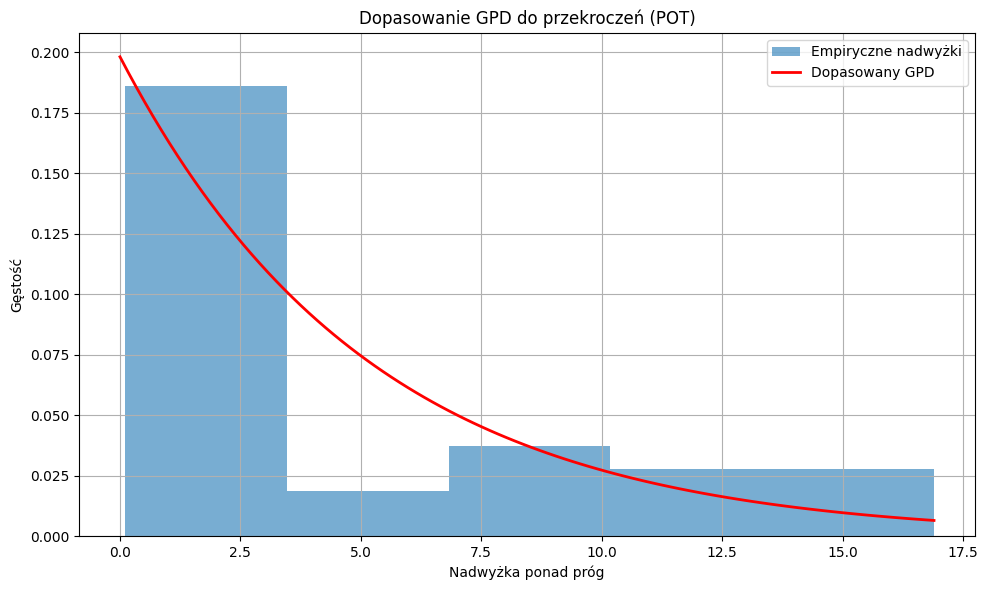

In [80]:
import matplotlib.pyplot as plt

x = np.linspace(0, exceedances.max(), 100)
pdf = genpareto.pdf(x, shape_gpd, loc=0, scale=scale_gpd)

plt.figure(figsize=(10, 6))
plt.hist(exceedances, bins=5, density=True, alpha=0.6, label='Empiryczne nadwyżki')
plt.plot(x, pdf, 'r-', lw=2, label='Dopasowany GPD')
plt.title("Dopasowanie GPD do przekroczeń (POT)")
plt.xlabel("Nadwyżka ponad próg")
plt.ylabel("Gęstość")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

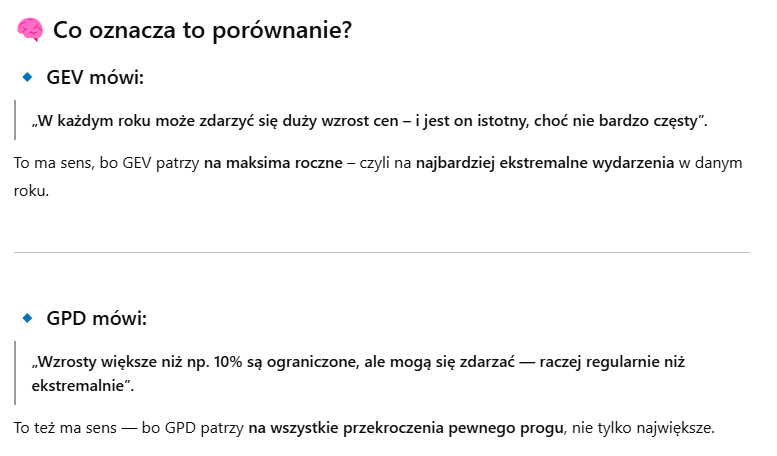

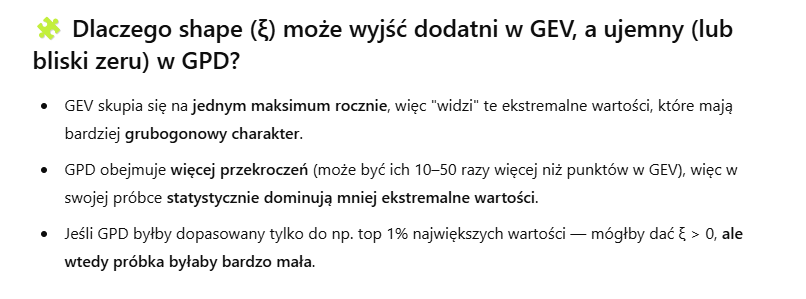

# Dystrybuanty GEV, GPD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def custom_gpd_cdf(x, phi):
    """Oblicza dystrybuantę według podanego wzoru, obsługuje przypadki brzegowe."""
    cdf = np.zeros_like(x)

    if phi == 0:
        # Gumbel case
        cdf = np.exp(-np.exp(-x))
    else:
        valid = 1 + phi * x > 0
        cdf[valid] = np.exp(-(1 + phi * x[valid])**(-1 / phi))
        if phi > 0:
            cdf[~valid] = 0  # dla x <= -1/phi
        elif phi < 0:
            cdf[x >= 1 / abs(phi)] = 1  # dla x >= 1/|phi|

    return cdf

# Zakres x i wartości phi do porównania
x = np.linspace(-5, 5, 500)
phi_values = [-1.0, -0.5, 0.0, 0.5, 1.0]

# Wykres
plt.figure(figsize=(10, 6))
for phi in phi_values:
    y = custom_gpd_cdf(x, phi)
    plt.plot(x, y, label=f'ξ = {phi}')

plt.title("Dystrybuanta GEV dla różnych ξ")
plt.xlabel("x")
plt.ylabel("CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x600 with 0 Axes>

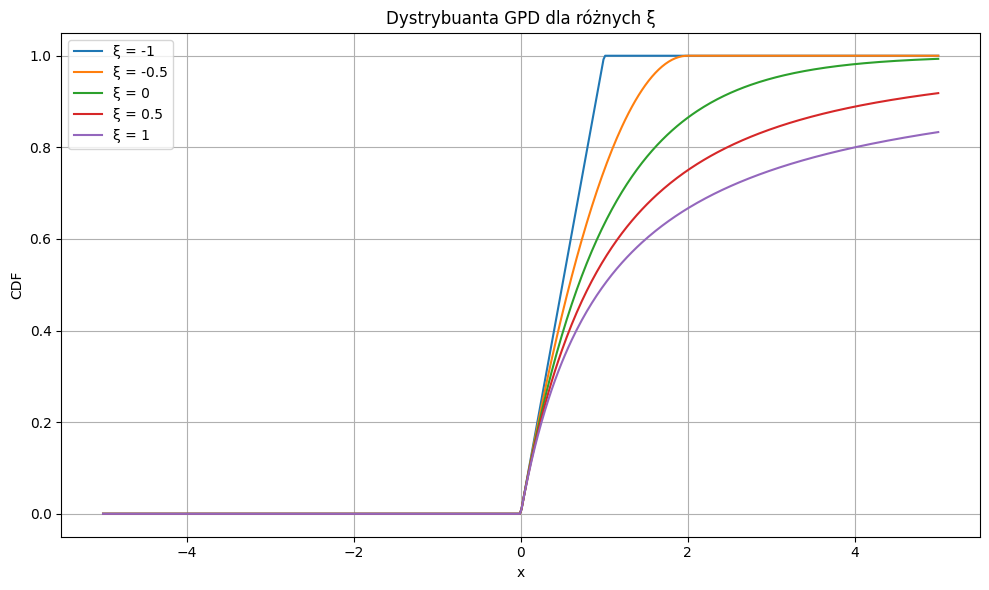

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def custom_gpd_cdf(x, phi, scale):
    """Poprawna wersja GPD CDF dla pojedynczego x."""
    if phi == 0:
        if x >= 0:
            return 1 - np.exp(-x / scale)
        else:
            return 0
    else:
        if x < 0:
            return 0
        elif phi > 0:
            return 1 - (1 + phi * x / scale) ** (-1 / phi)
        elif phi < 0:
            upper_bound = -scale / phi
            if x <= upper_bound:
                return 1 - (1 + phi * x / scale) ** (-1 / phi)
            else:
                return 1


# Zakres x i wartości phi do porównania
x = np.linspace(-5, 5, 500)
phi_values = [-1, -0.5, 0, 0.5, 1]

# Wykres
plt.figure(figsize=(10, 6))
for phi in phi_values:
    y = [custom_gpd_cdf(x_i, phi, 1) for x_i in x]
    plt.plot(x, y, label=f'ξ = {phi}')

plt.title("Dystrybuanta GPD dla różnych ξ")
plt.xlabel("x")
plt.ylabel("CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Backtesting

Odchylenie standardowe (przeszłość): 8.6070
Odchylenie standardowe (przyszłość): 14.7683

=== F-test równości wariancji ===
F-statystyka: 0.3397
p-value: 0.0000
Odrzucamy hipotezę – wariancje różnią się istotnie.

Test Levene'a:
Statystyka: 29.0197, p-value: 0.0000


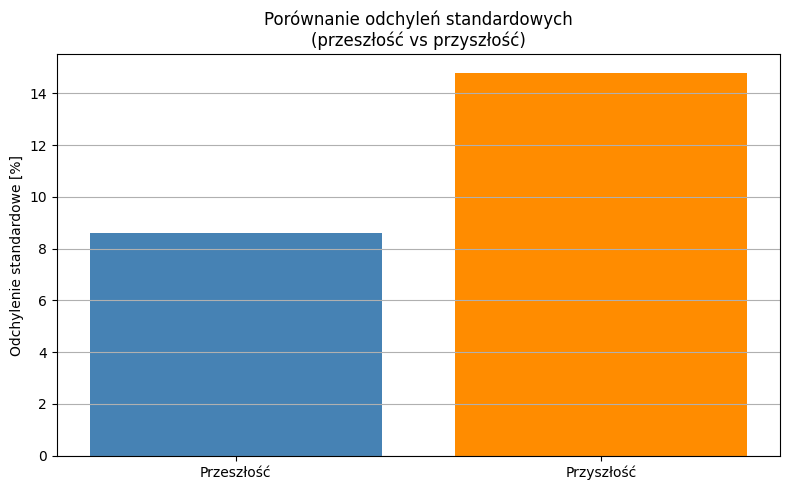

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, f
from scipy.stats import levene  # alternatywny test
from pandas import Series

zmiany_procentowe = Series(dane_cukier).pct_change().dropna() * 100
daty_zmian = daty_cukier[1:]  # pierwszy tydzień nie ma zmiany

# Zakładamy, że `zmiany_procentowe` już istnieje (z Twojego wcześniejszego kodu)
dane = np.array(zmiany_procentowe)
n = len(dane)
połowa = 80 * n // 100

# Podział na przeszłość i przyszłość
dane_past = dane[:połowa]
dane_future = dane[połowa:]

# Oblicz odchylenie standardowe
std_past = np.std(dane_past, ddof=1)
std_future = np.std(dane_future, ddof=1)

print(f"Odchylenie standardowe (przeszłość): {std_past:.4f}")
print(f"Odchylenie standardowe (przyszłość): {std_future:.4f}")

# Wariancje
var_past = np.var(dane_past, ddof=1)
var_future = np.var(dane_future, ddof=1)

# F-test (hipoteza H0: wariancje są równe)
f_stat = var_past / var_future
df1, df2 = len(dane_past) - 1, len(dane_future) - 1
p_value = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))  # test dwustronny

print(f"\n=== F-test równości wariancji ===")
print(f"F-statystyka: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Brak podstaw do odrzucenia hipotezy – wariancje mogą być równe.")
else:
    print("Odrzucamy hipotezę – wariancje różnią się istotnie.")

# Alternatywa: test Levene'a (mniej czuły na nienormalność)
stat_levene, p_levene = levene(dane_past, dane_future)
print(f"\nTest Levene'a:\nStatystyka: {stat_levene:.4f}, p-value: {p_levene:.4f}")

# Wykres porównawczy odchyleń standardowych
plt.figure(figsize=(8, 5))
plt.bar(['Przeszłość', 'Przyszłość'], [std_past, std_future], color=['steelblue', 'darkorange'])
plt.title('Porównanie odchyleń standardowych\n(przeszłość vs przyszłość)')
plt.ylabel('Odchylenie standardowe [%]')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
